In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set Pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # None means unlimited
pd.set_option('display.max_columns', None)

In [4]:
# upload a dataset
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
5     E1001011   27    Male       Life Sciences      Divorced   
6     E1001016   50    Male           Marketing       Married   
7     E1001019   28  Female       Life Sciences        Single   
8     E1001020   36  Female       Life Sciences       Married   
9     E1001021   38  Female       Life Sciences        Single   
10    E1001022   44    Male             Medical        Single   
11    E1001024   47  Female             Medical      Divorced   
12    E1001025   30    Male           Marketing      Divorced   
13    E1001027   29    Male       Life Sciences        Single   
14    E1001030   42    Male             Medical      Divorced   
15    E1001035   34  Female             Medical        Single   
16    E1001038   39  Female     Human Resources       Married   
17    E1001040   56    Male             Medical       Married   
18    E1001041   40  Female             Medical        Single   
19    E1001042   27  Female             Medical        Single   
20    E1001044   29    Male           Marketing      Divorced   
21    E1001047   53    Male       Life Sciences        Single   
22    E1001049   35  Female       Life Sciences      Divorced   
23    E1001050   32    Male       Life Sciences       Married   
24    E1001053   34  Female       Life Sciences      Divorced   
25    E1001054   52    Male           Marketing       Married   
26    E1001058   33    Male               Other        Single   
27    E1001059   25  Female             Medical        Single   
28    E1001061   45    Male    Technical Degree        Single   
29    E1001062   23    Male             Medical        Single   
30    E1001063   47  Female       Life Sciences        Single   
31    E1001064   34    Male               Other        Single   
32    E1001067   36    Male       Life Sciences        Single   
33    E1001069   52    Male             Medical       Married   
34    E1001070   26  Female       Life Sciences      Divorced   
35    E1001071   29  Female             Medical       Married   
36    E1001074   26    Male    Technical Degree        Single   
37    E1001075   34  Female       Life Sciences        Single   
38    E1001077   54  Female             Medical      Divorced   
39    E1001078   27    Male           Marketing       Married   
40    E1001080   37  Female       Life Sciences      Divorced   
41    E1001081   38  Female       Life Sciences        Single   
42    E1001082   34  Female             Medical        Single   
43    E1001083   35  Female       Life Sciences       Married   
44    E1001085   40  Female             Medical       Married   
45    E1001086   34  Female       Life Sciences       Married   
46    E1001090   24    Male       Life Sciences      Divorced   
47    E1001091   52  Female       Life Sciences       Married   
48    E1001093   50    Male             Medical       Married   
49    E1001094   29  Female       Life Sciences       Married   
50    E1001095   33    Male             Medical       Married   
51    E1001097   33  Female           Marketing        Single   
52    E1001098   47  Female               Other       Married   
53    E1001101   36  Female               Other       Married   
54    E1001102   29    Male       Life Sciences       Married   
55    E1001104   35  Female       Life Sciences        Single   
56    E1001105   42  Female       Life Sciences       Married   
57    E1001106   28    Male             Medical        Single   
58    E1001107   36    Male     Human Resources       Married   
59    E1001110   40    Male             Medical        Single   
60    E1001111   30  Female             

## Univariate Analysis

                                             |                                             | [  0%]   00:00 ->…


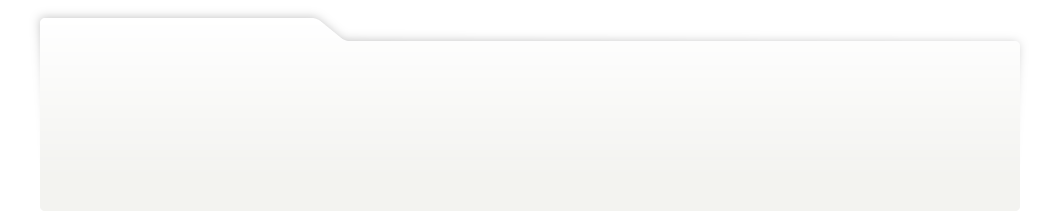
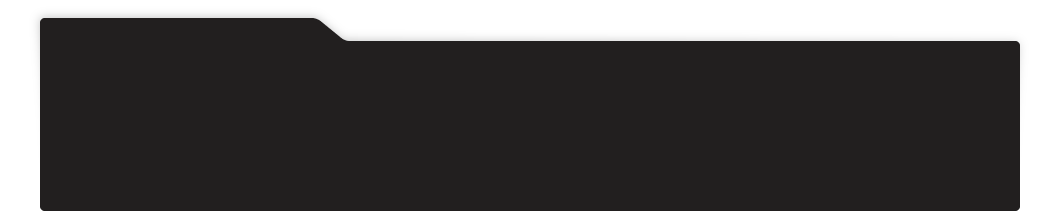
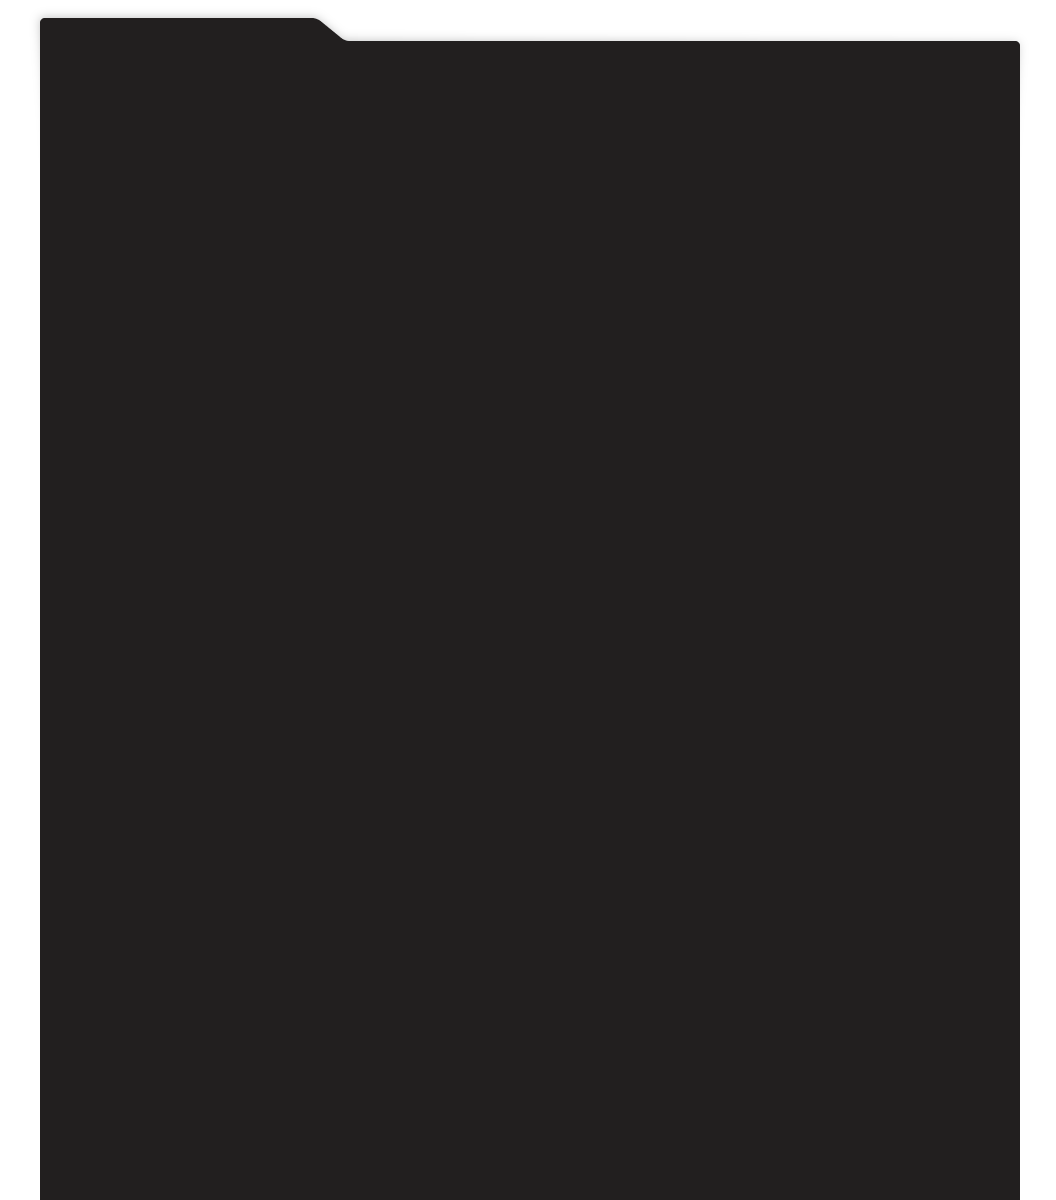
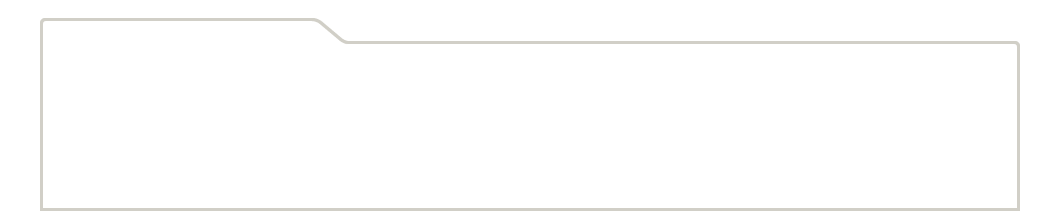
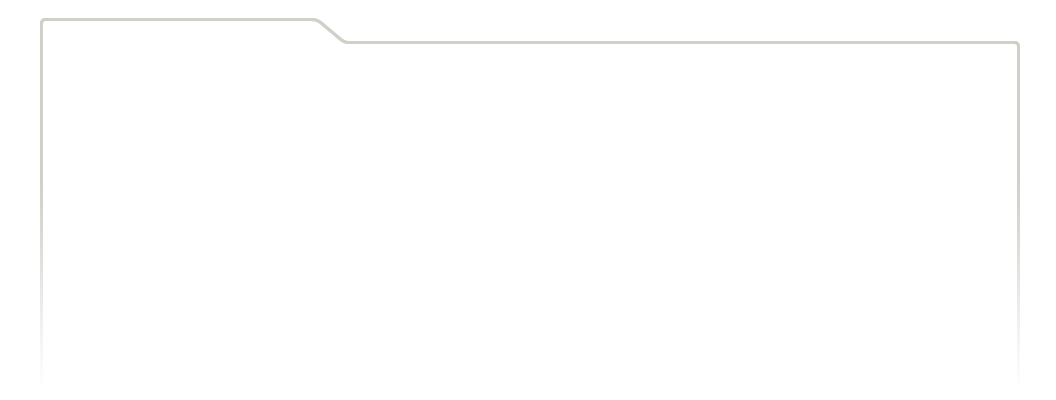
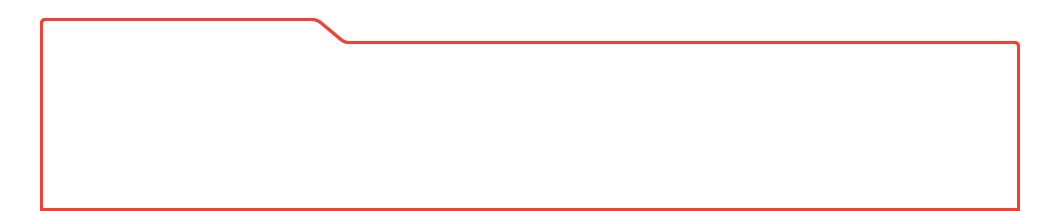
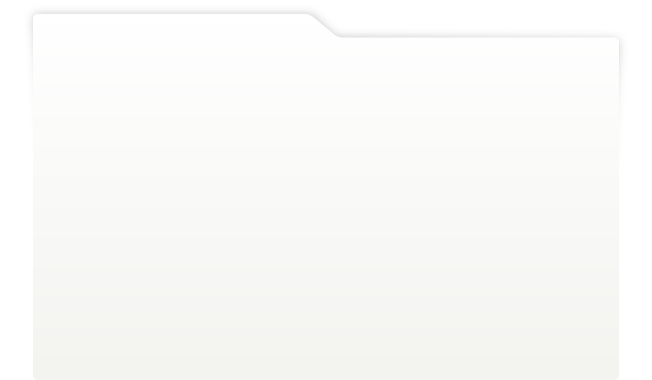
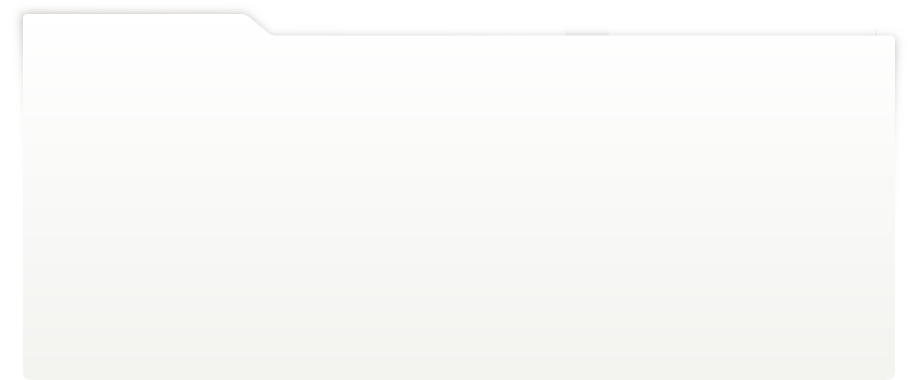
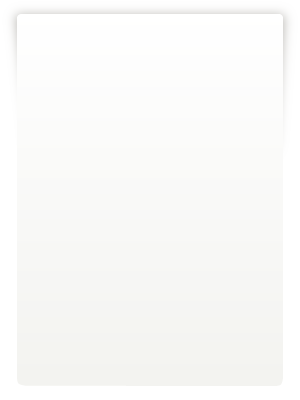
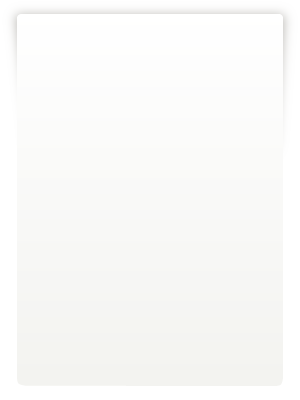
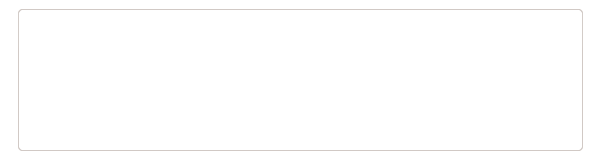
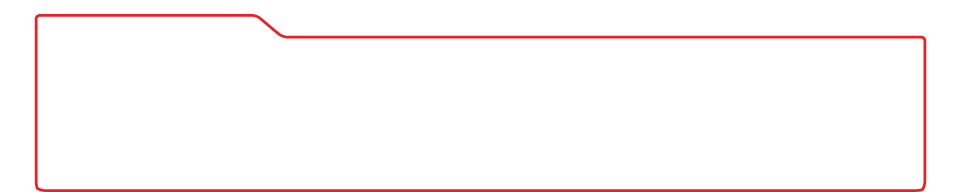
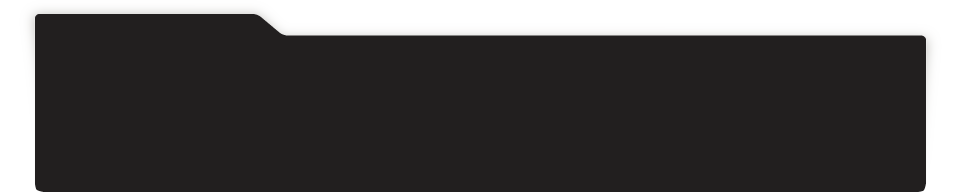
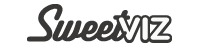
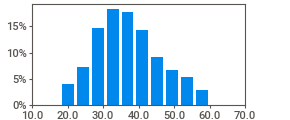
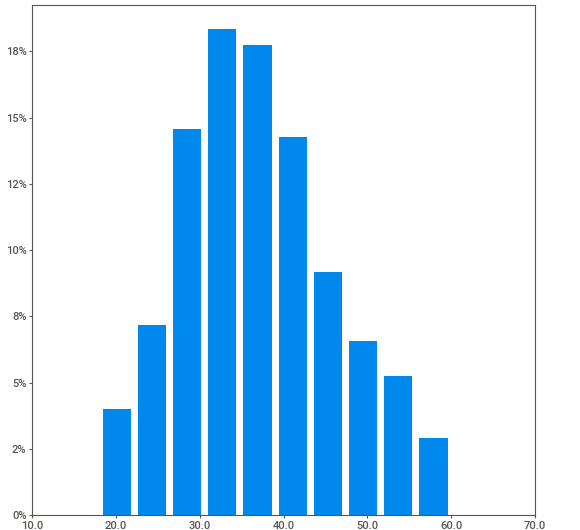
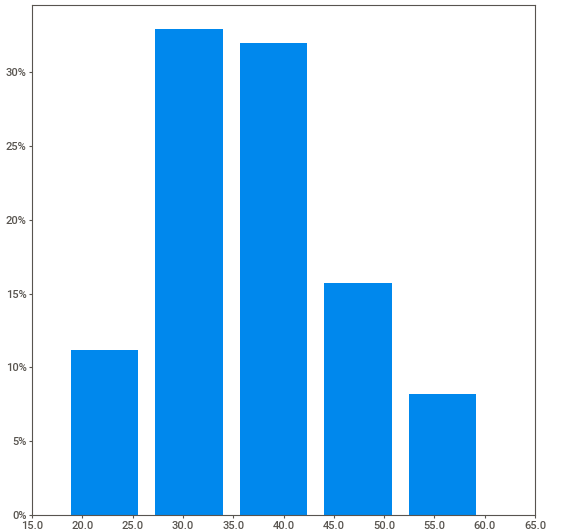
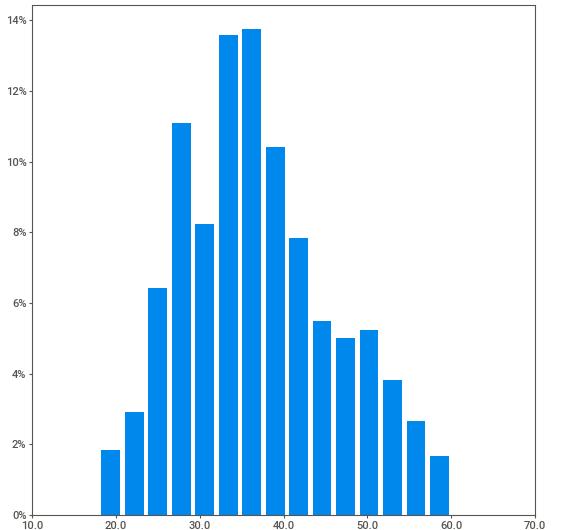
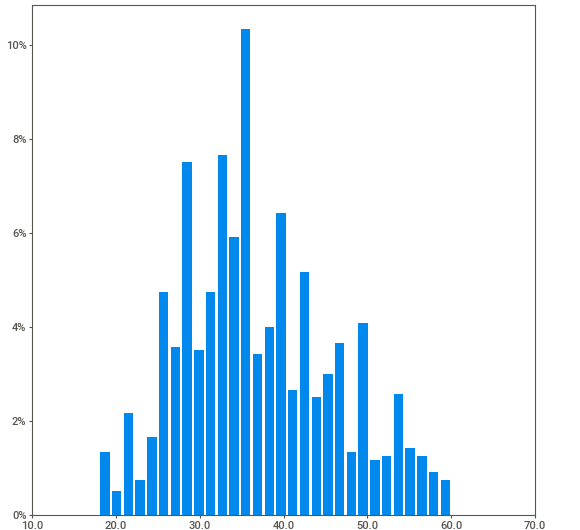
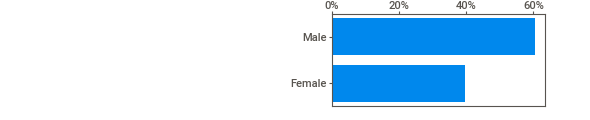
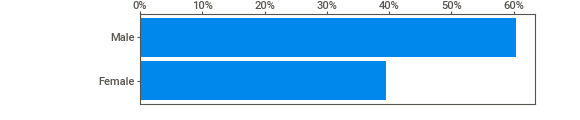
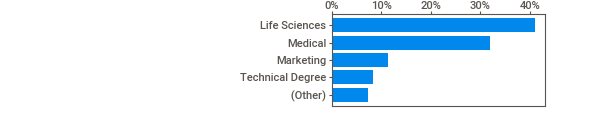
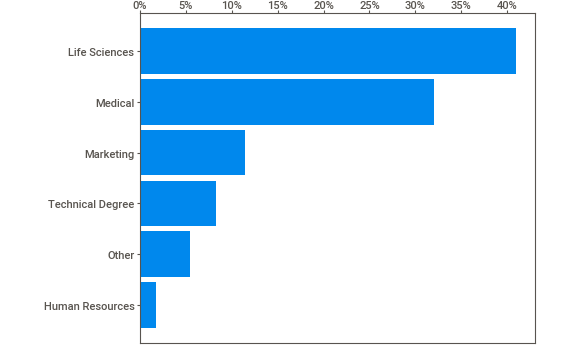
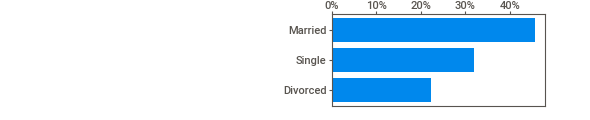
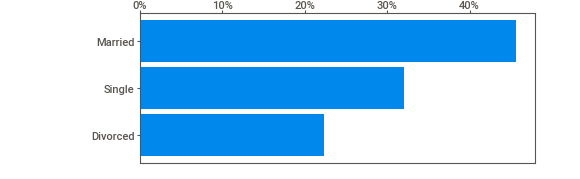
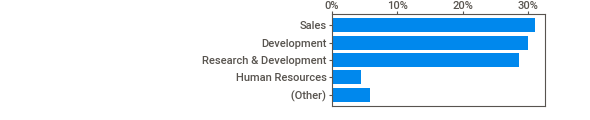
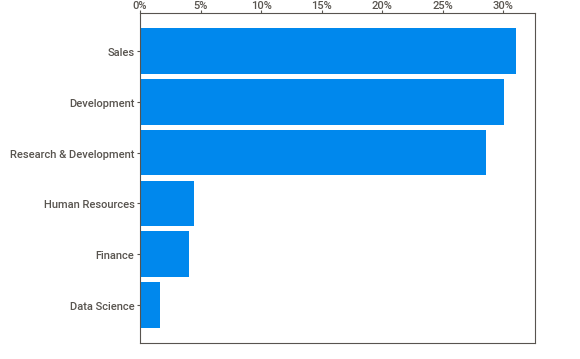
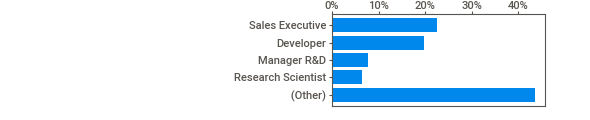
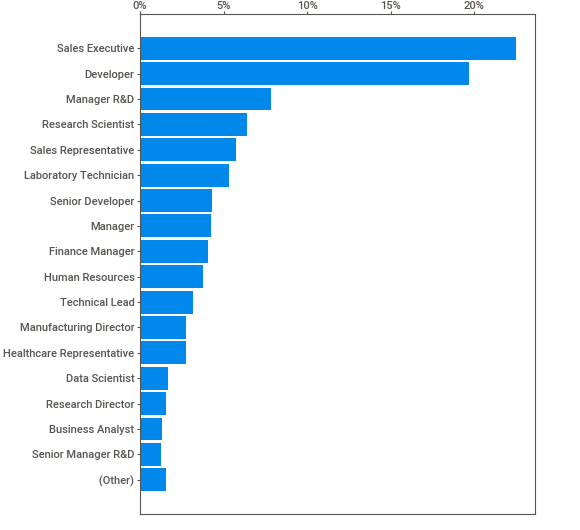
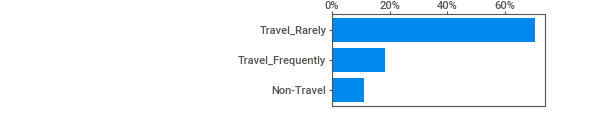
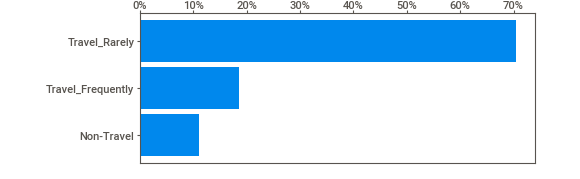
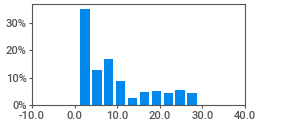
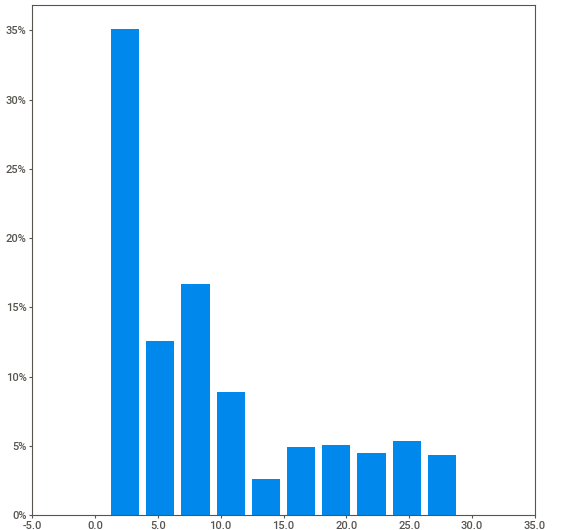
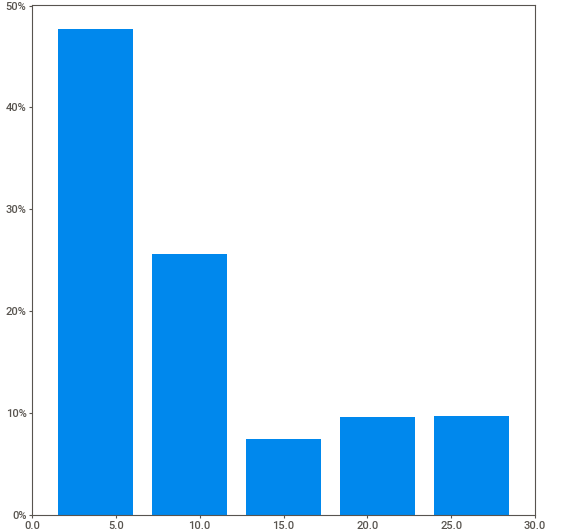
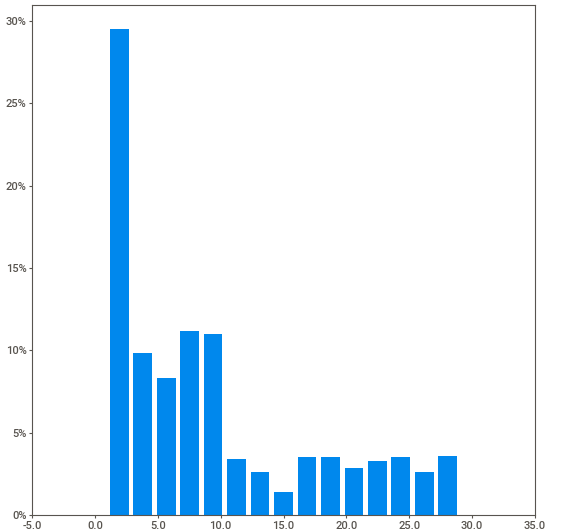
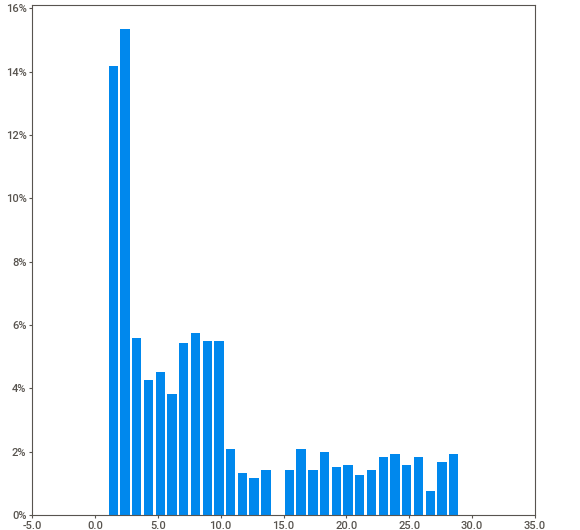
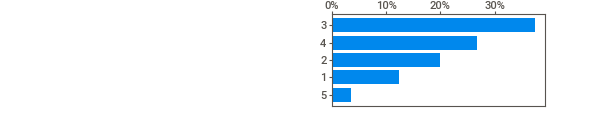
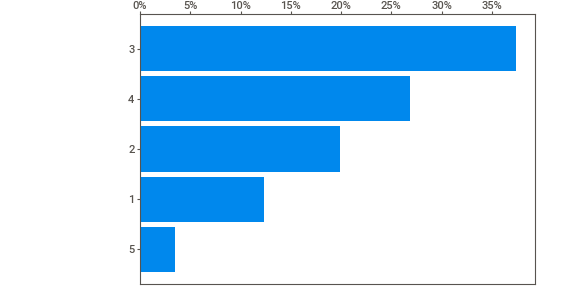
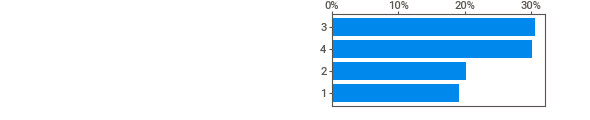
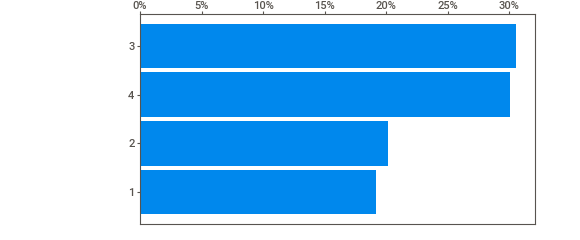
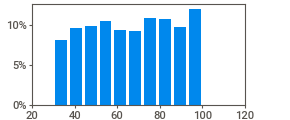
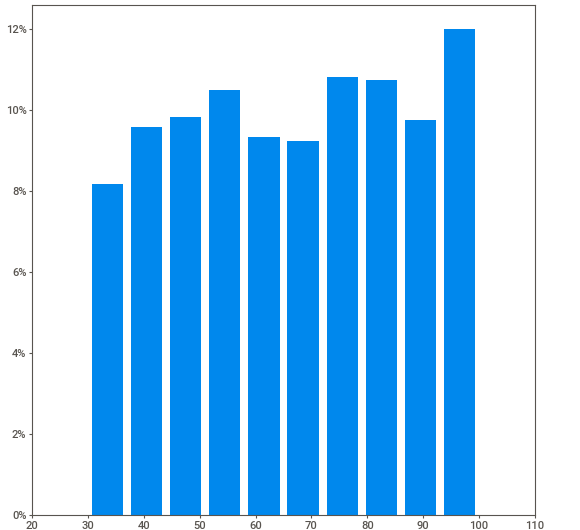
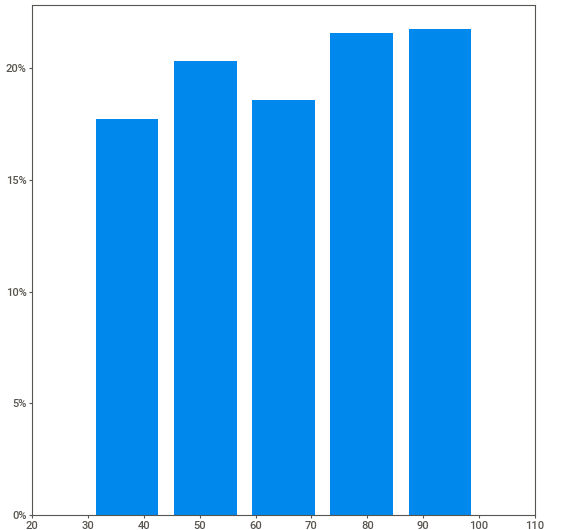
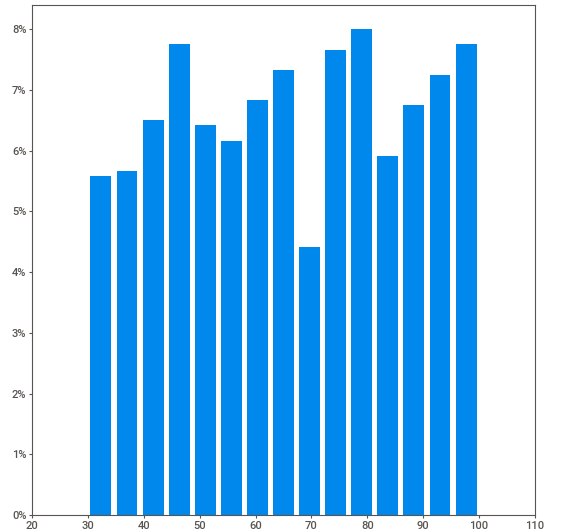
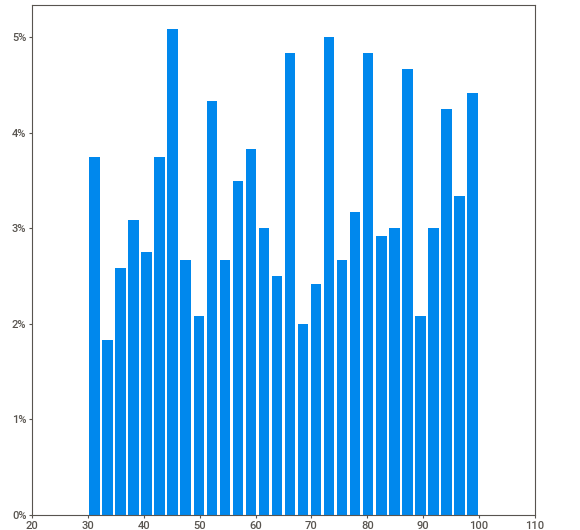
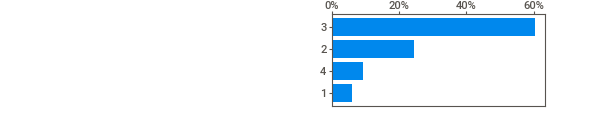
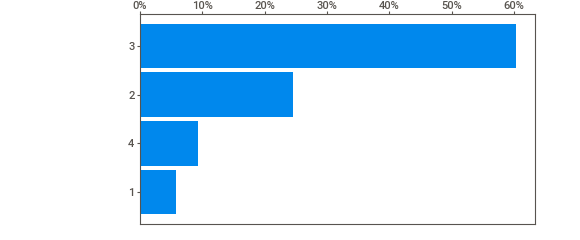
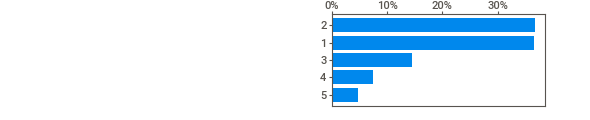
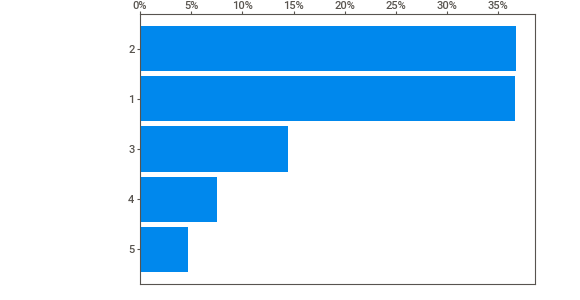
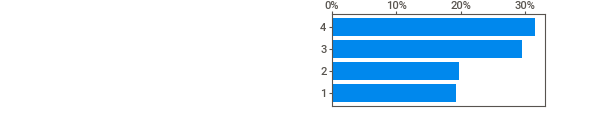
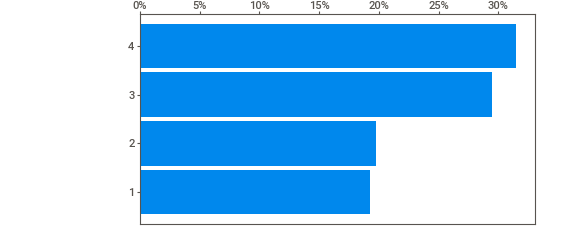
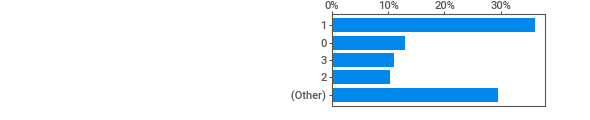
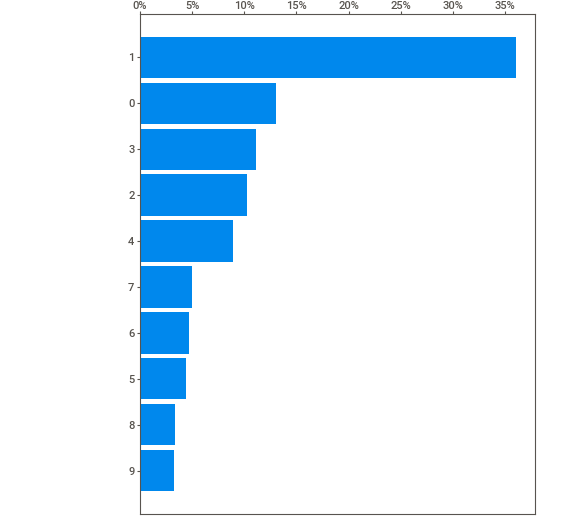
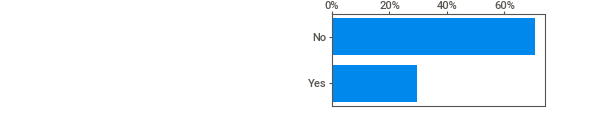
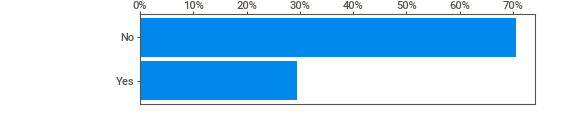
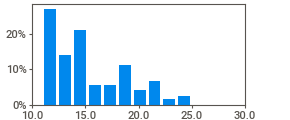
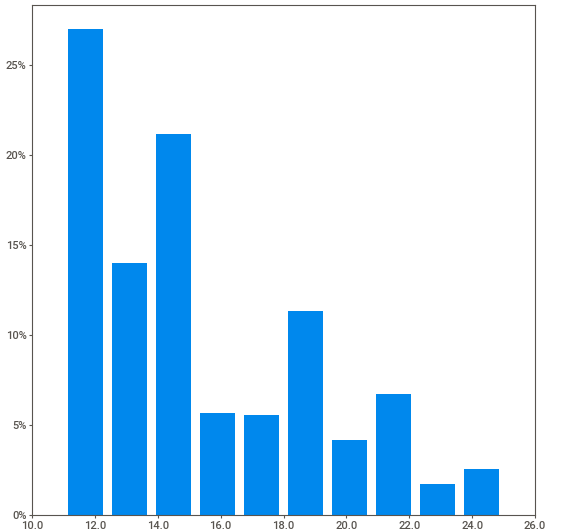
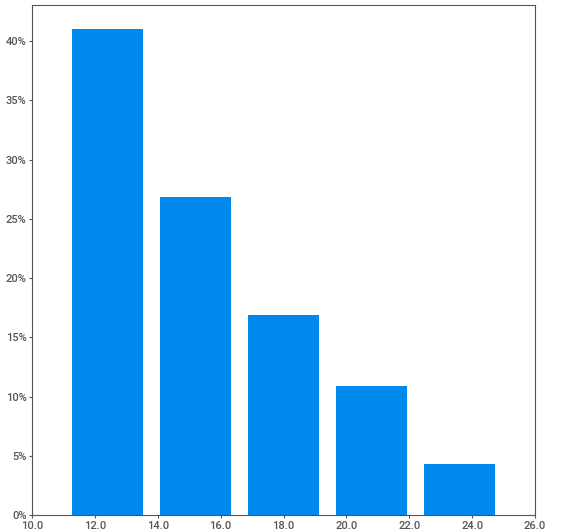
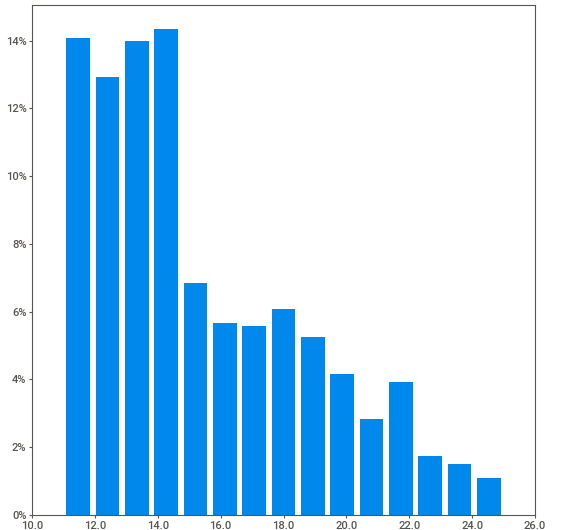
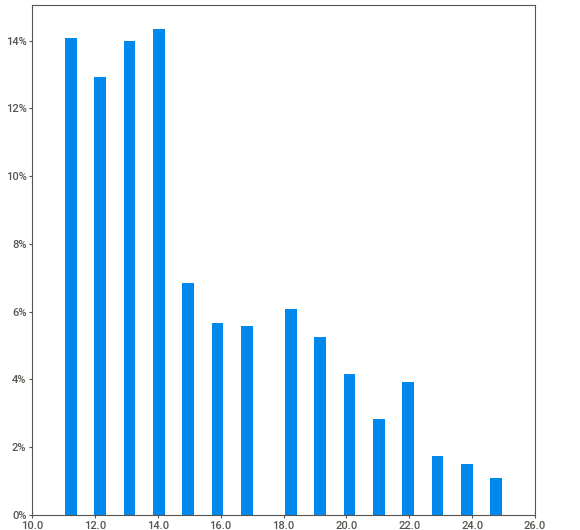
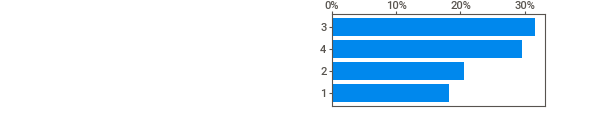
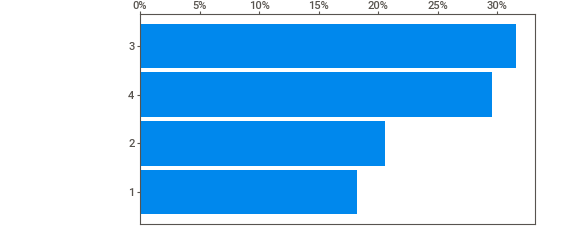
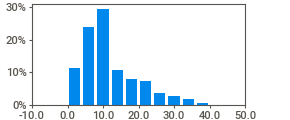
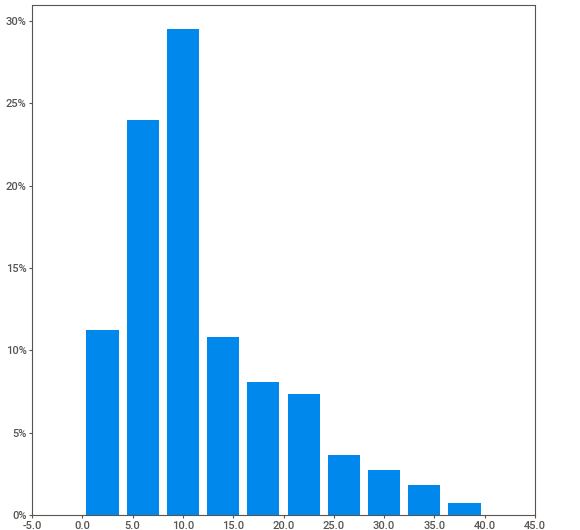
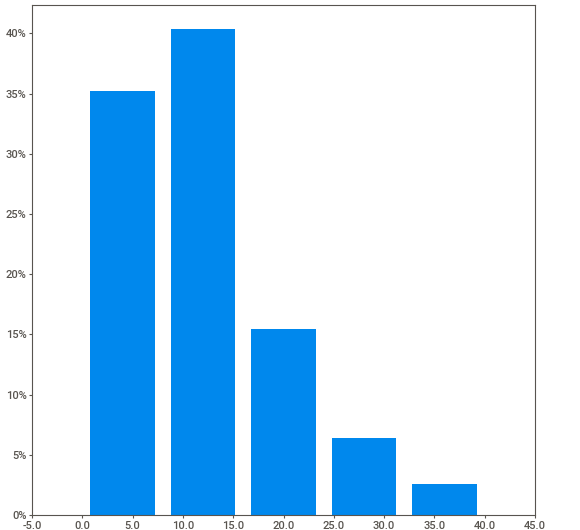
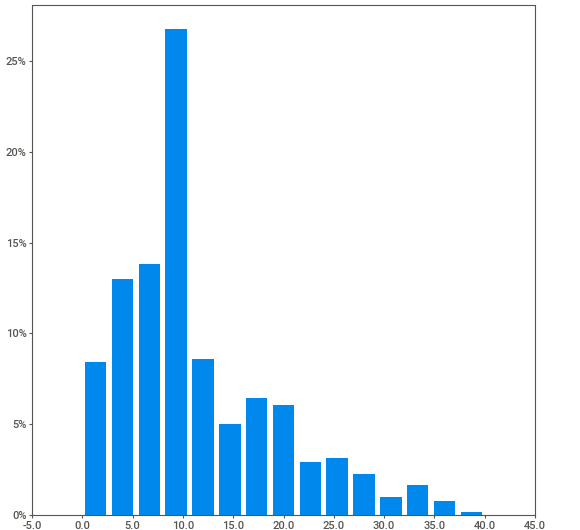
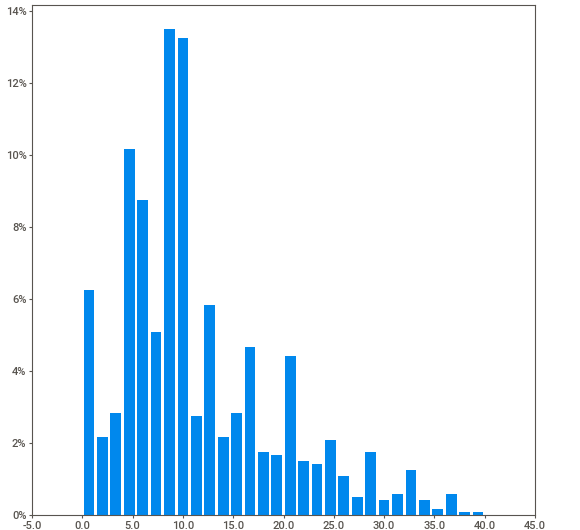
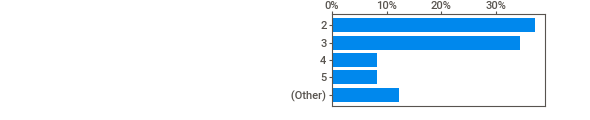
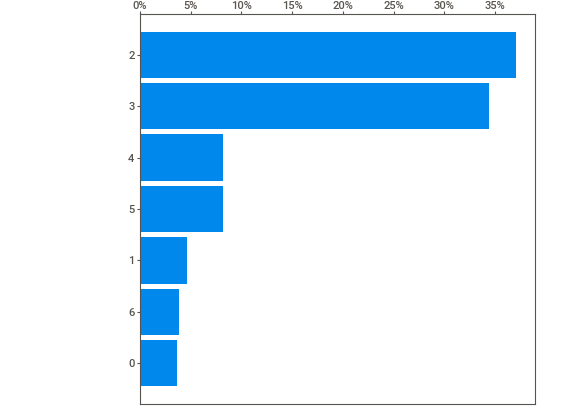
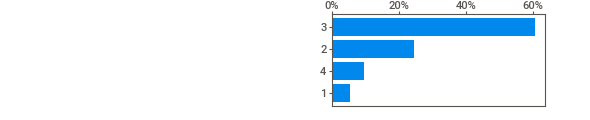
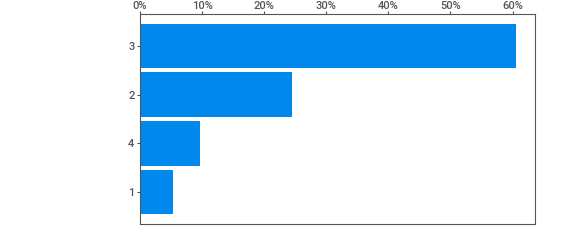
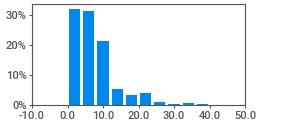
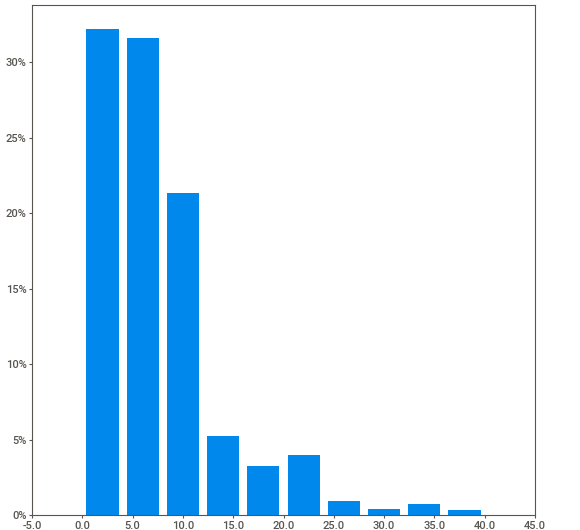
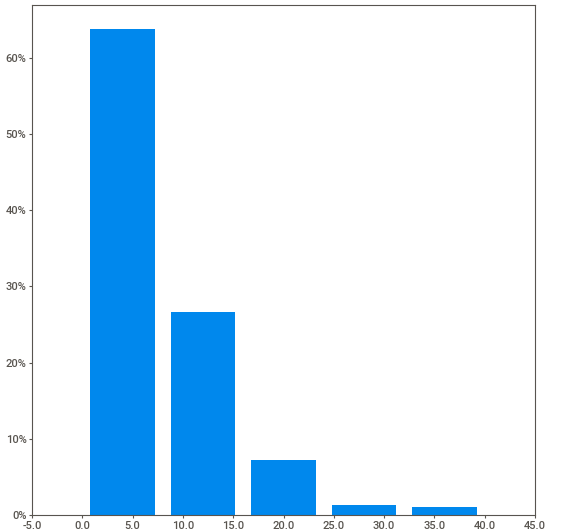
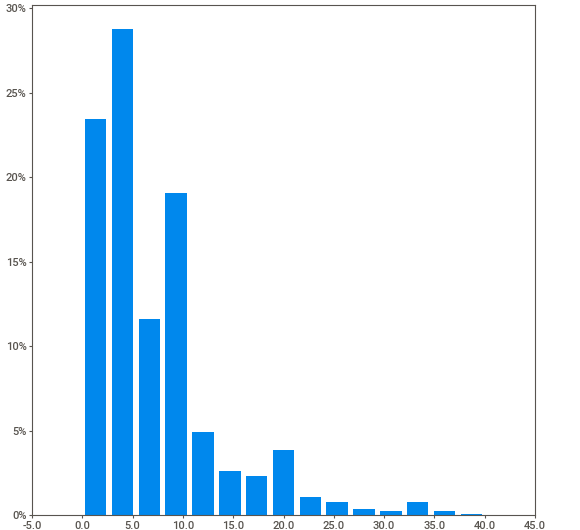
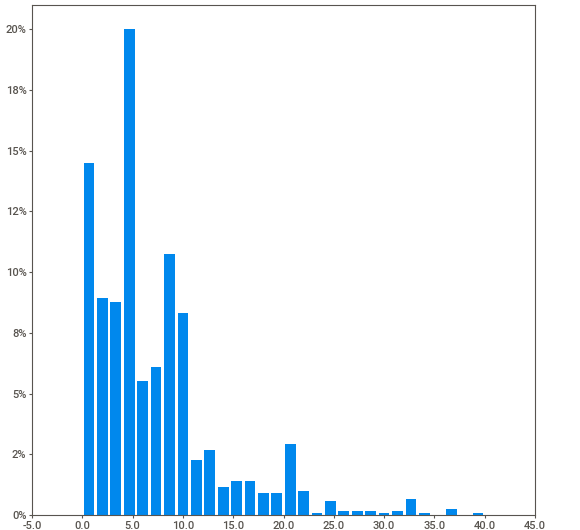
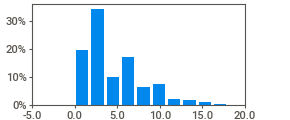
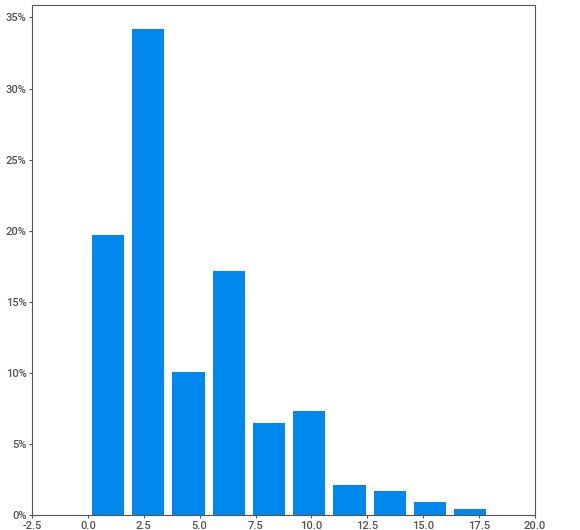
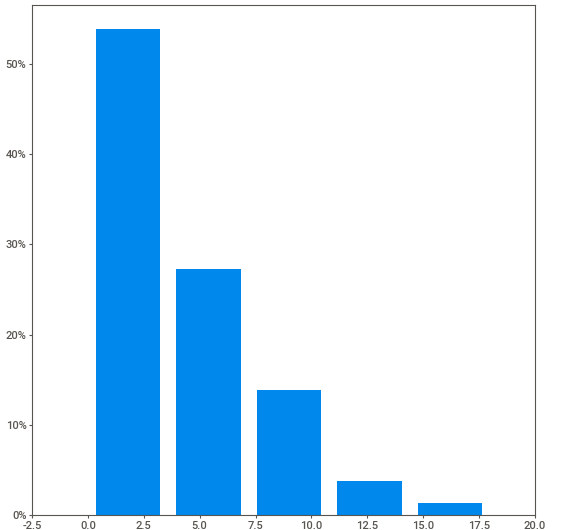
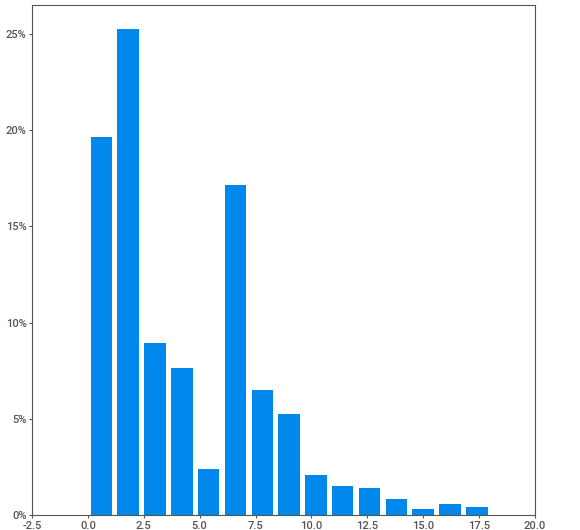
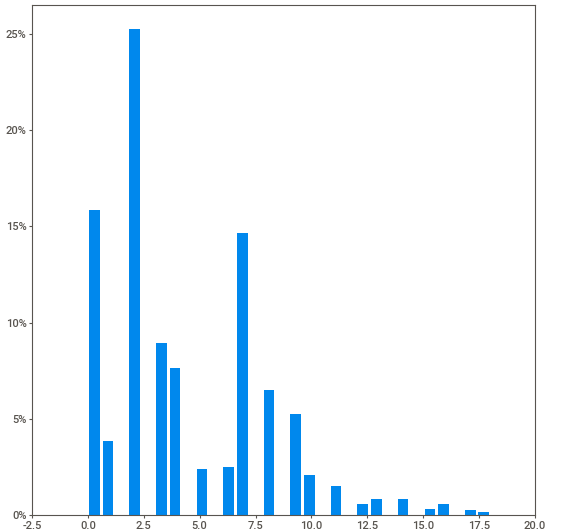
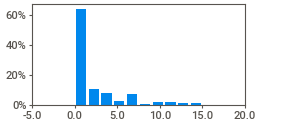
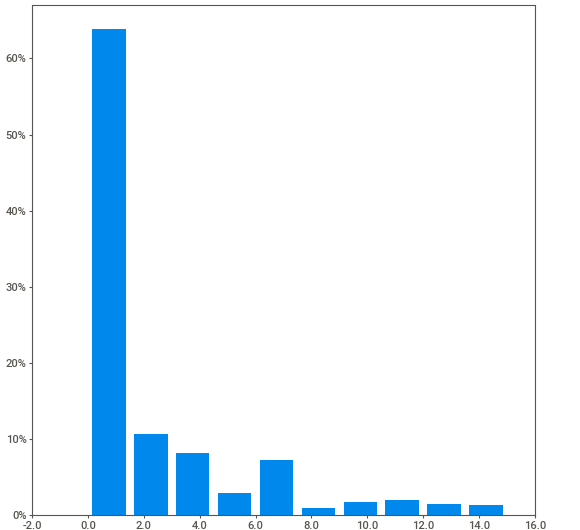
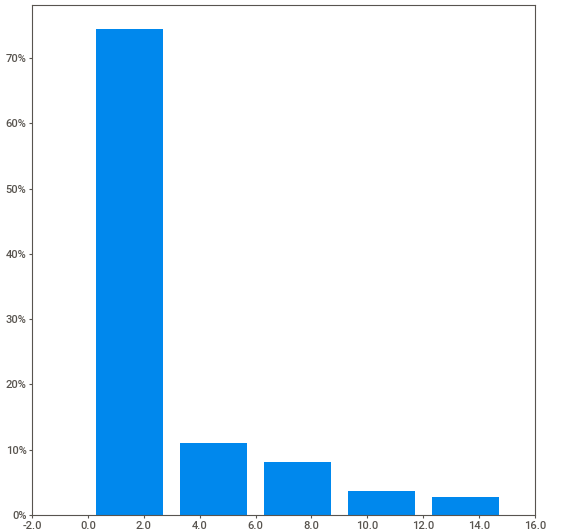
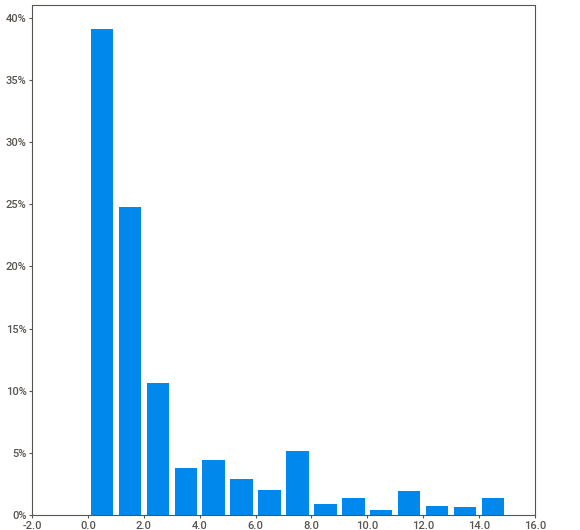
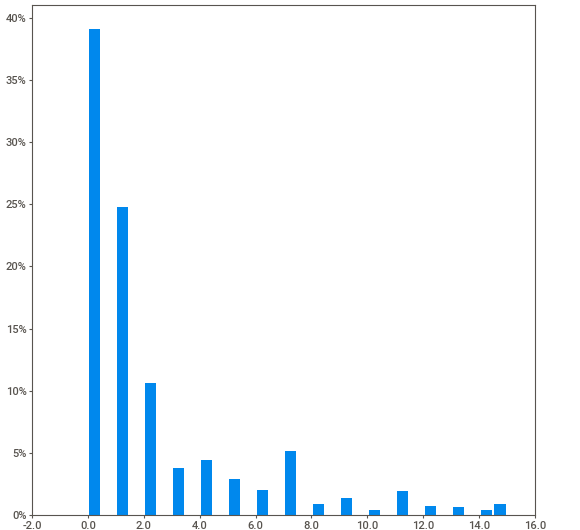
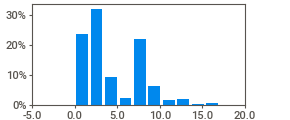
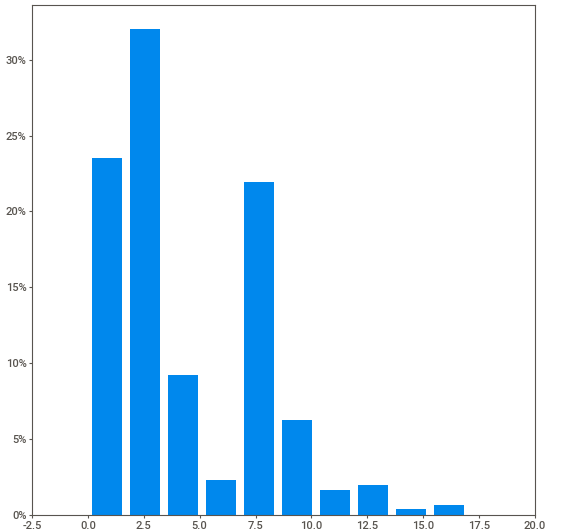
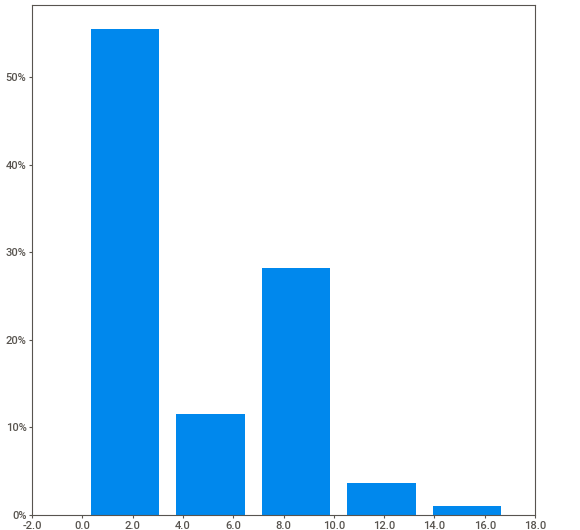
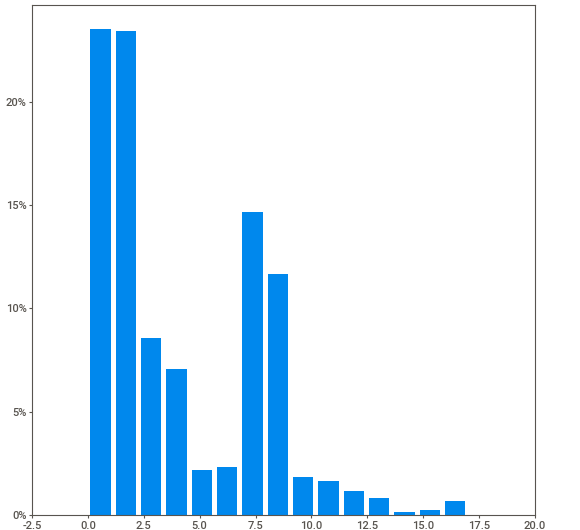
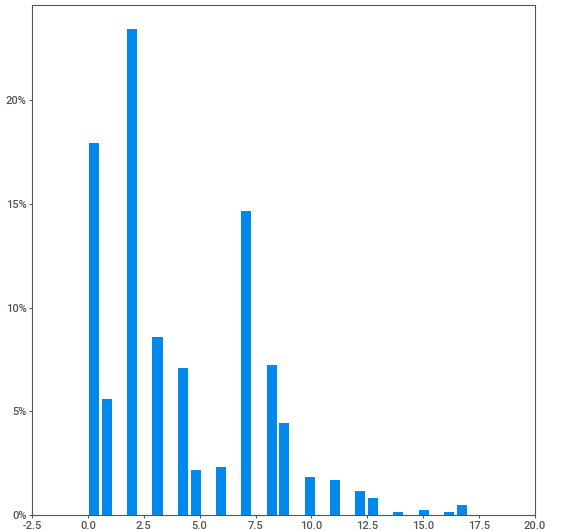
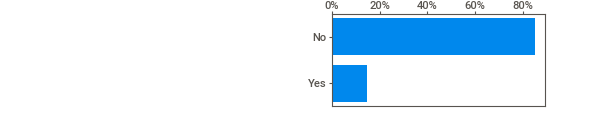
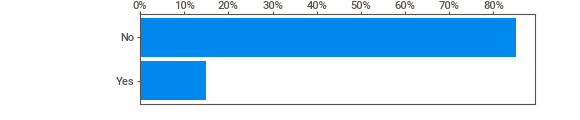
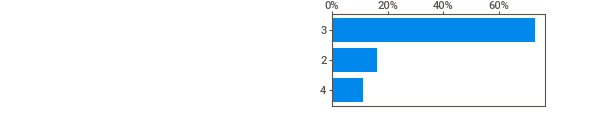
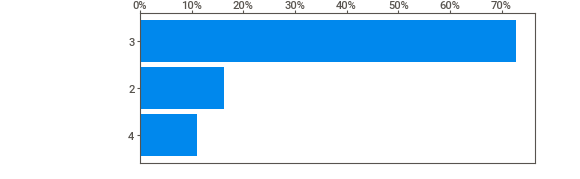
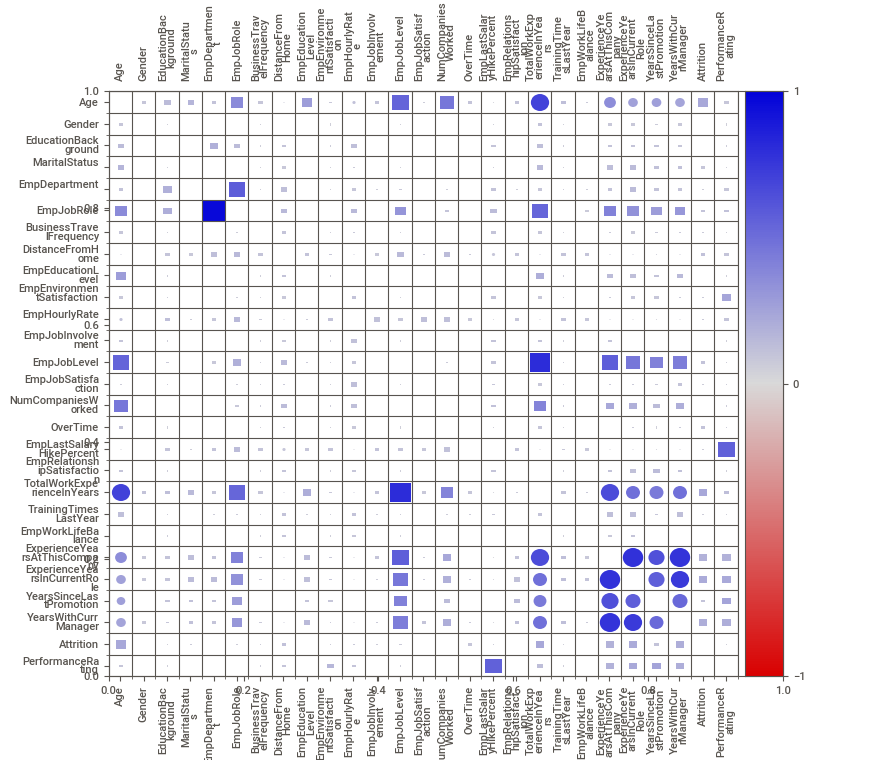
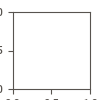

In [6]:
import sweetviz as sv
report = sv.analyze(data)
report.show_notebook()

<Axes: xlabel='PerformanceRating', ylabel='count'>

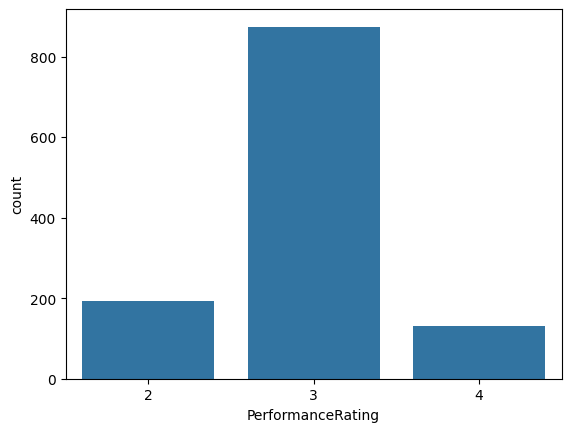

In [5]:
# check whether data is balanced or not
# data balanced: Equal number of records related to performance or not
sns.countplot(x=data.PerformanceRating)

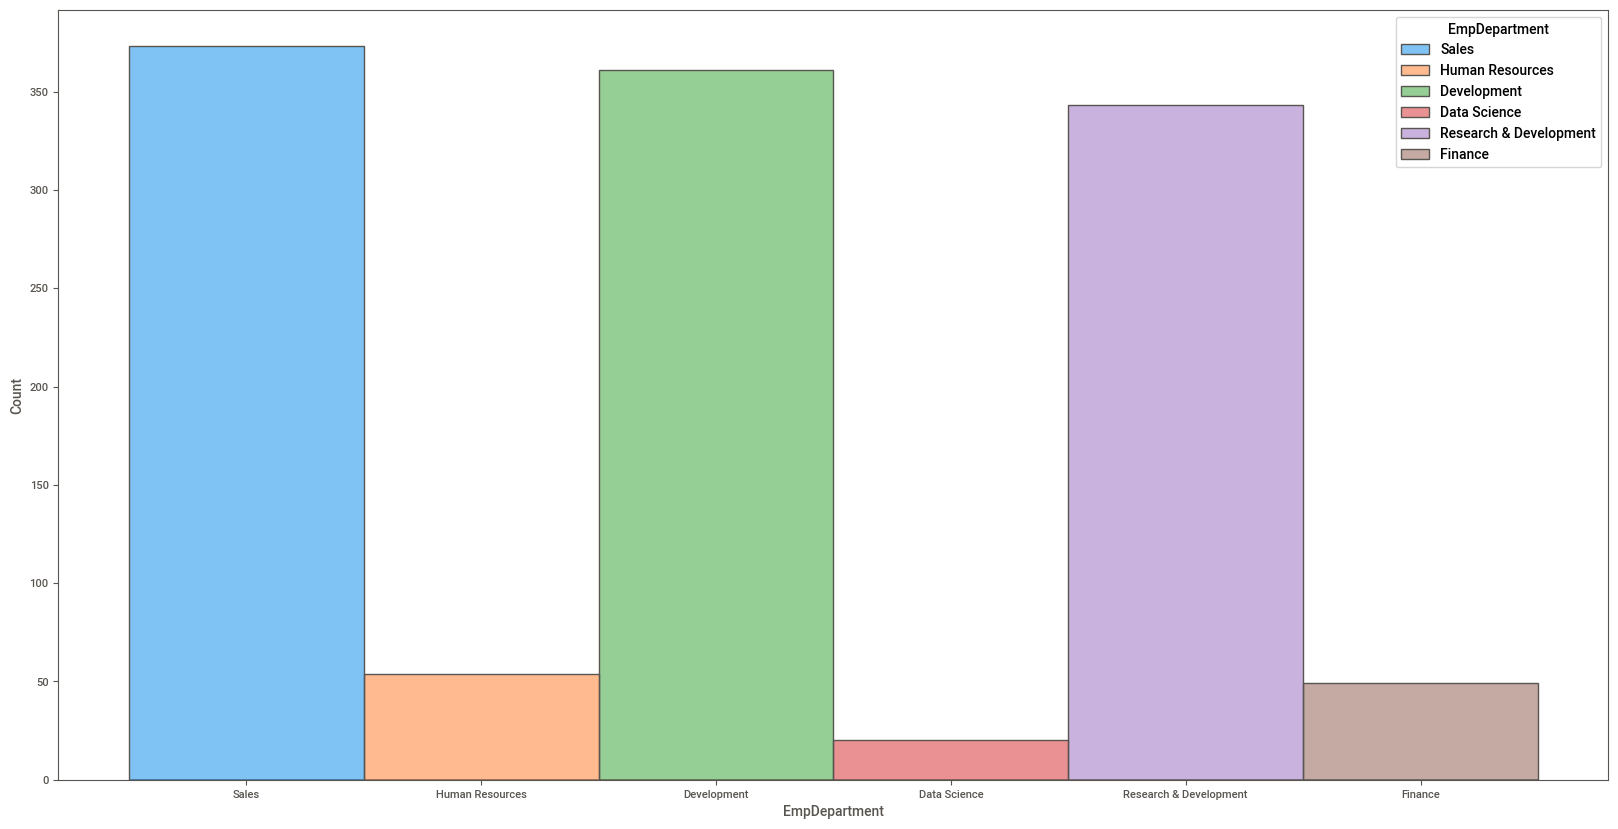

In [7]:
plt.figure(figsize=(20,10))
sns.histplot(data=data,x='EmpDepartment',kde=True,hue='EmpDepartment')
plt.show()

<Axes: xlabel='ExperienceYearsAtThisCompany', ylabel='count'>

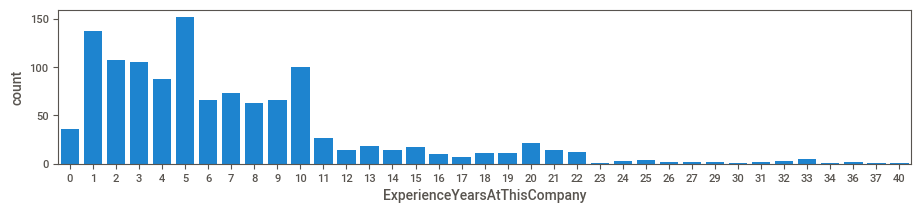

In [8]:
plt.figure(figsize=(11,2))
sns.countplot(data=data,x='ExperienceYearsAtThisCompany')

## Bivariate Analysis

In [9]:
## creating seperate dataframe for categorical columns
data1 = data[['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition']]

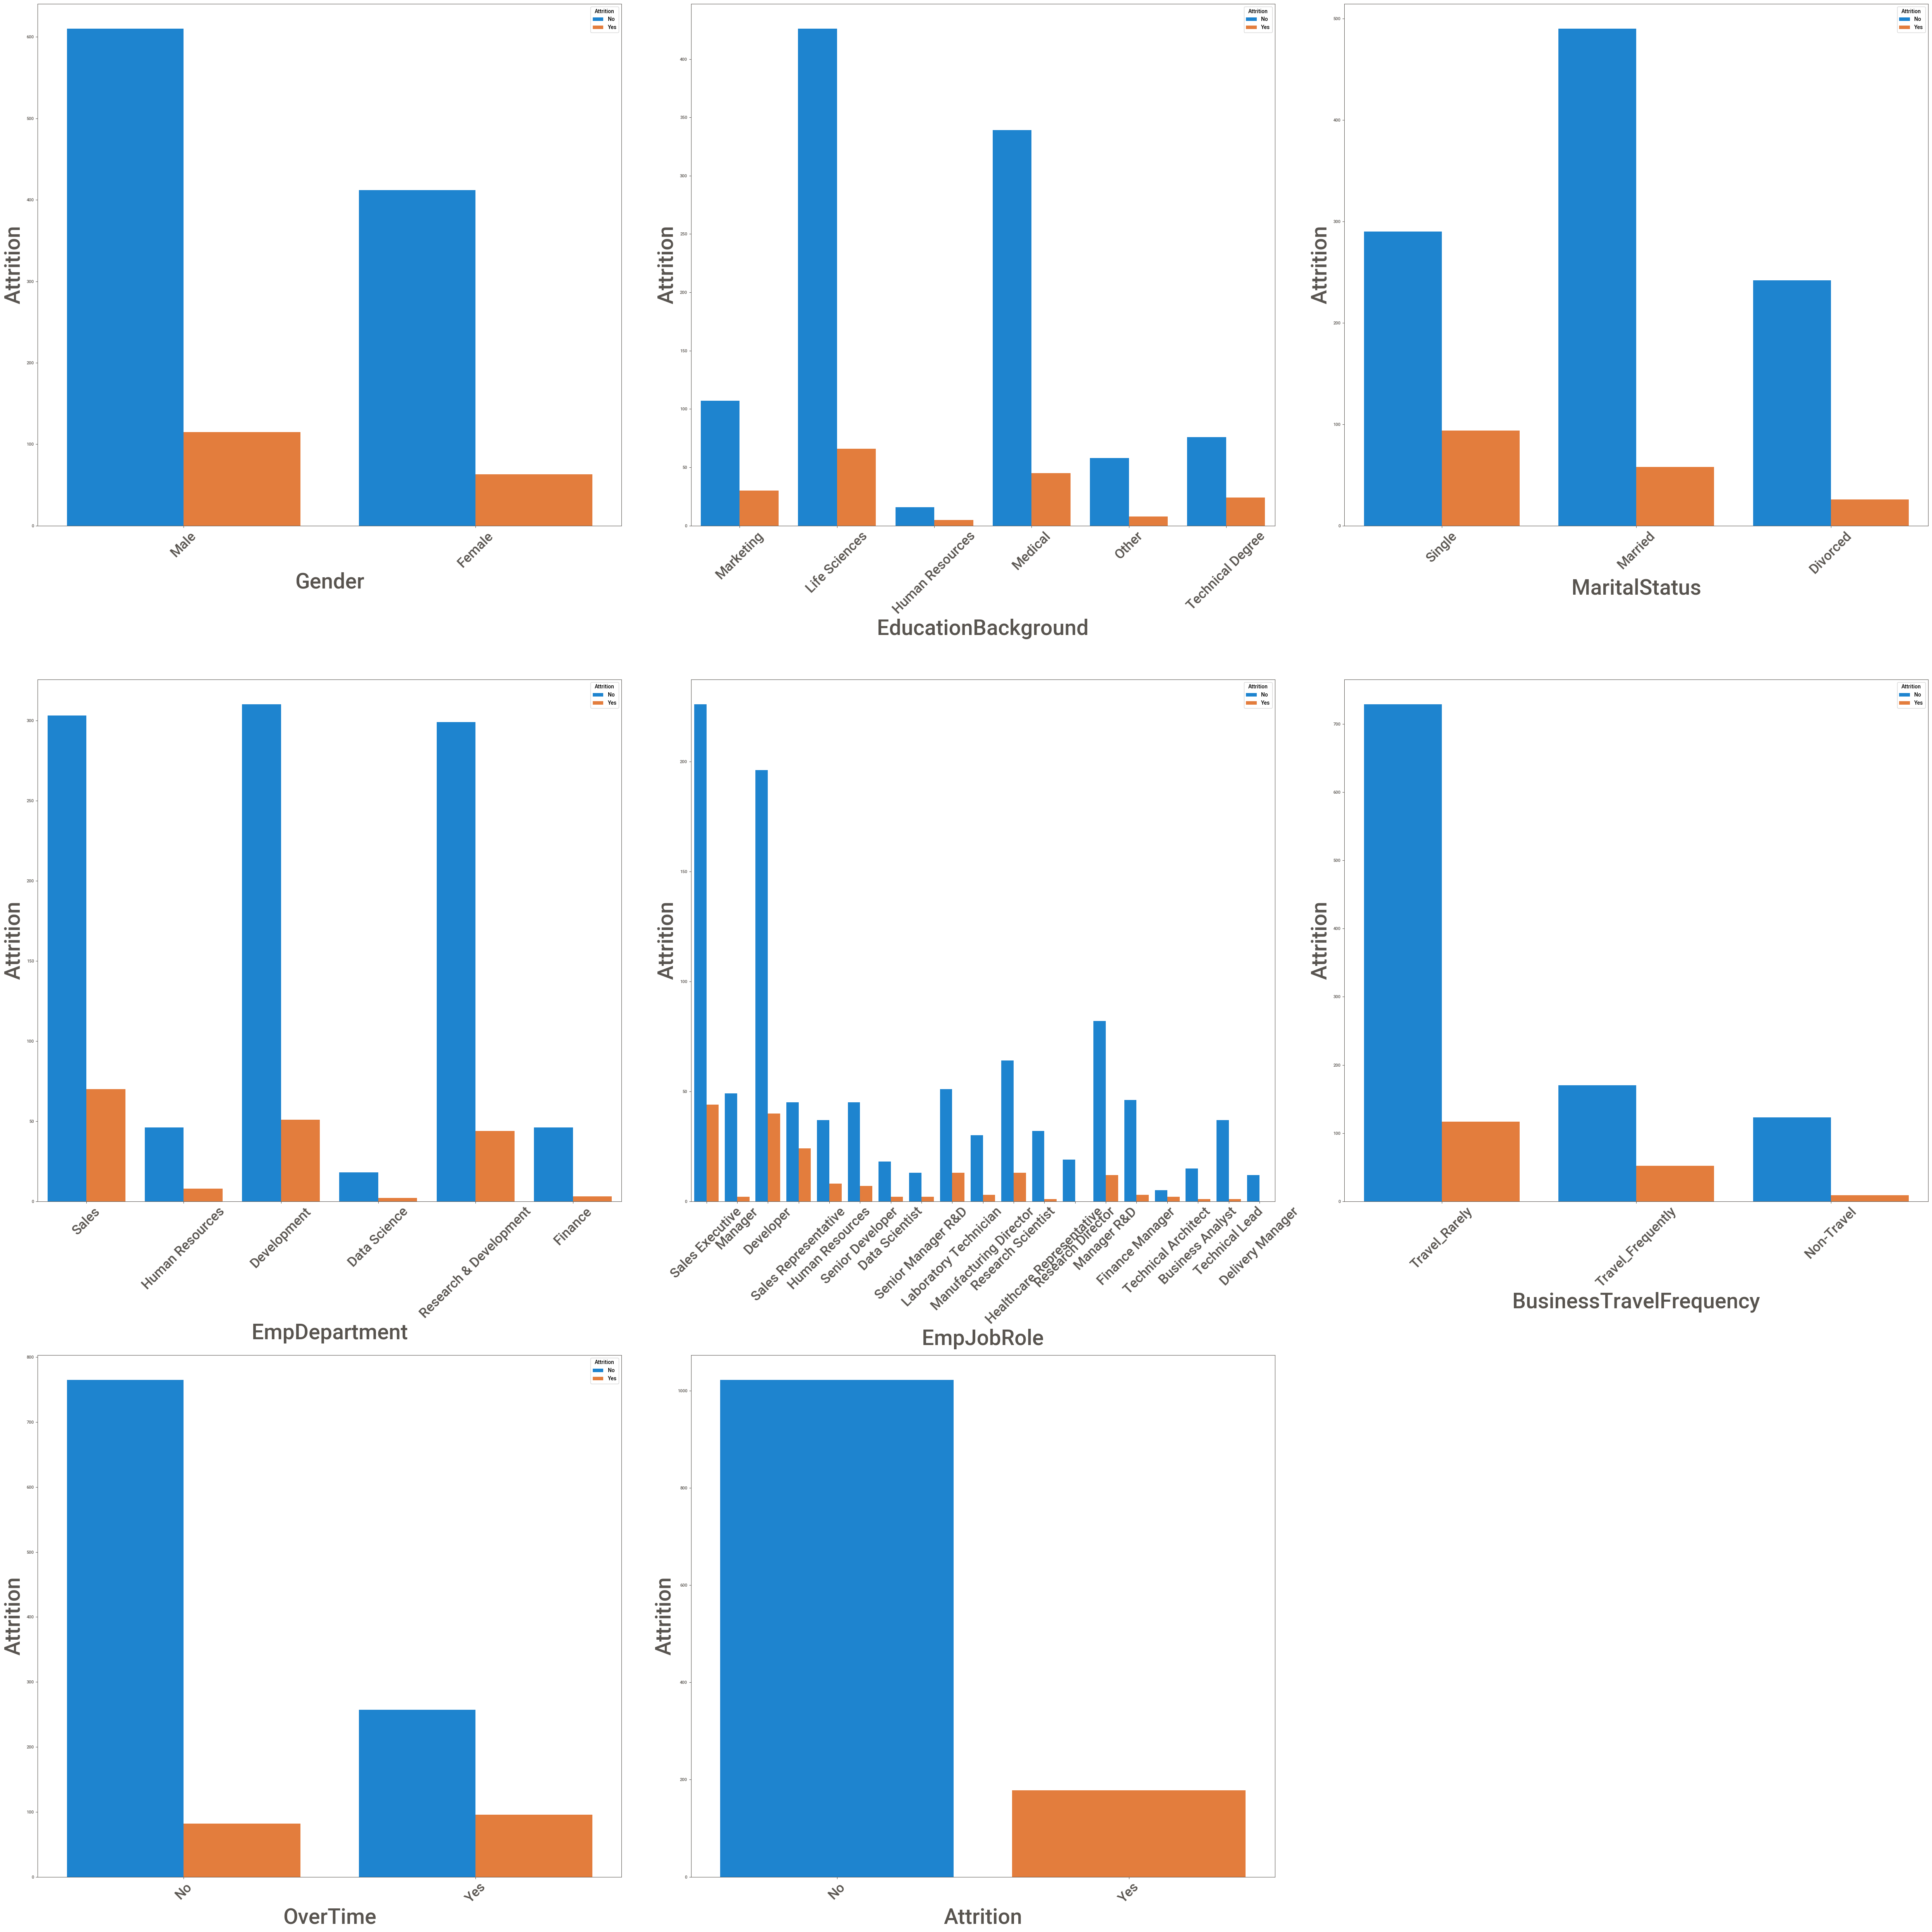

In [10]:
plt.figure(figsize=(50,50),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=16:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=data1[column].dropna(axis=0),hue=data.Attrition)
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Attrition',fontsize=40)
        plt.xticks(fontsize=25,rotation=45)
    plotnumber+=1
plt.tight_layout()

In [11]:
# for discrete columns
data2 = data[['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate','EmpJobInvolvement',
'EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked','OverTime','EmpLastSalaryHikePercent','EmpRelationshipSatisfaction','TotalWorkExperienceInYears',
'TrainingTimesLastYear','EmpWorkLifeBalance','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

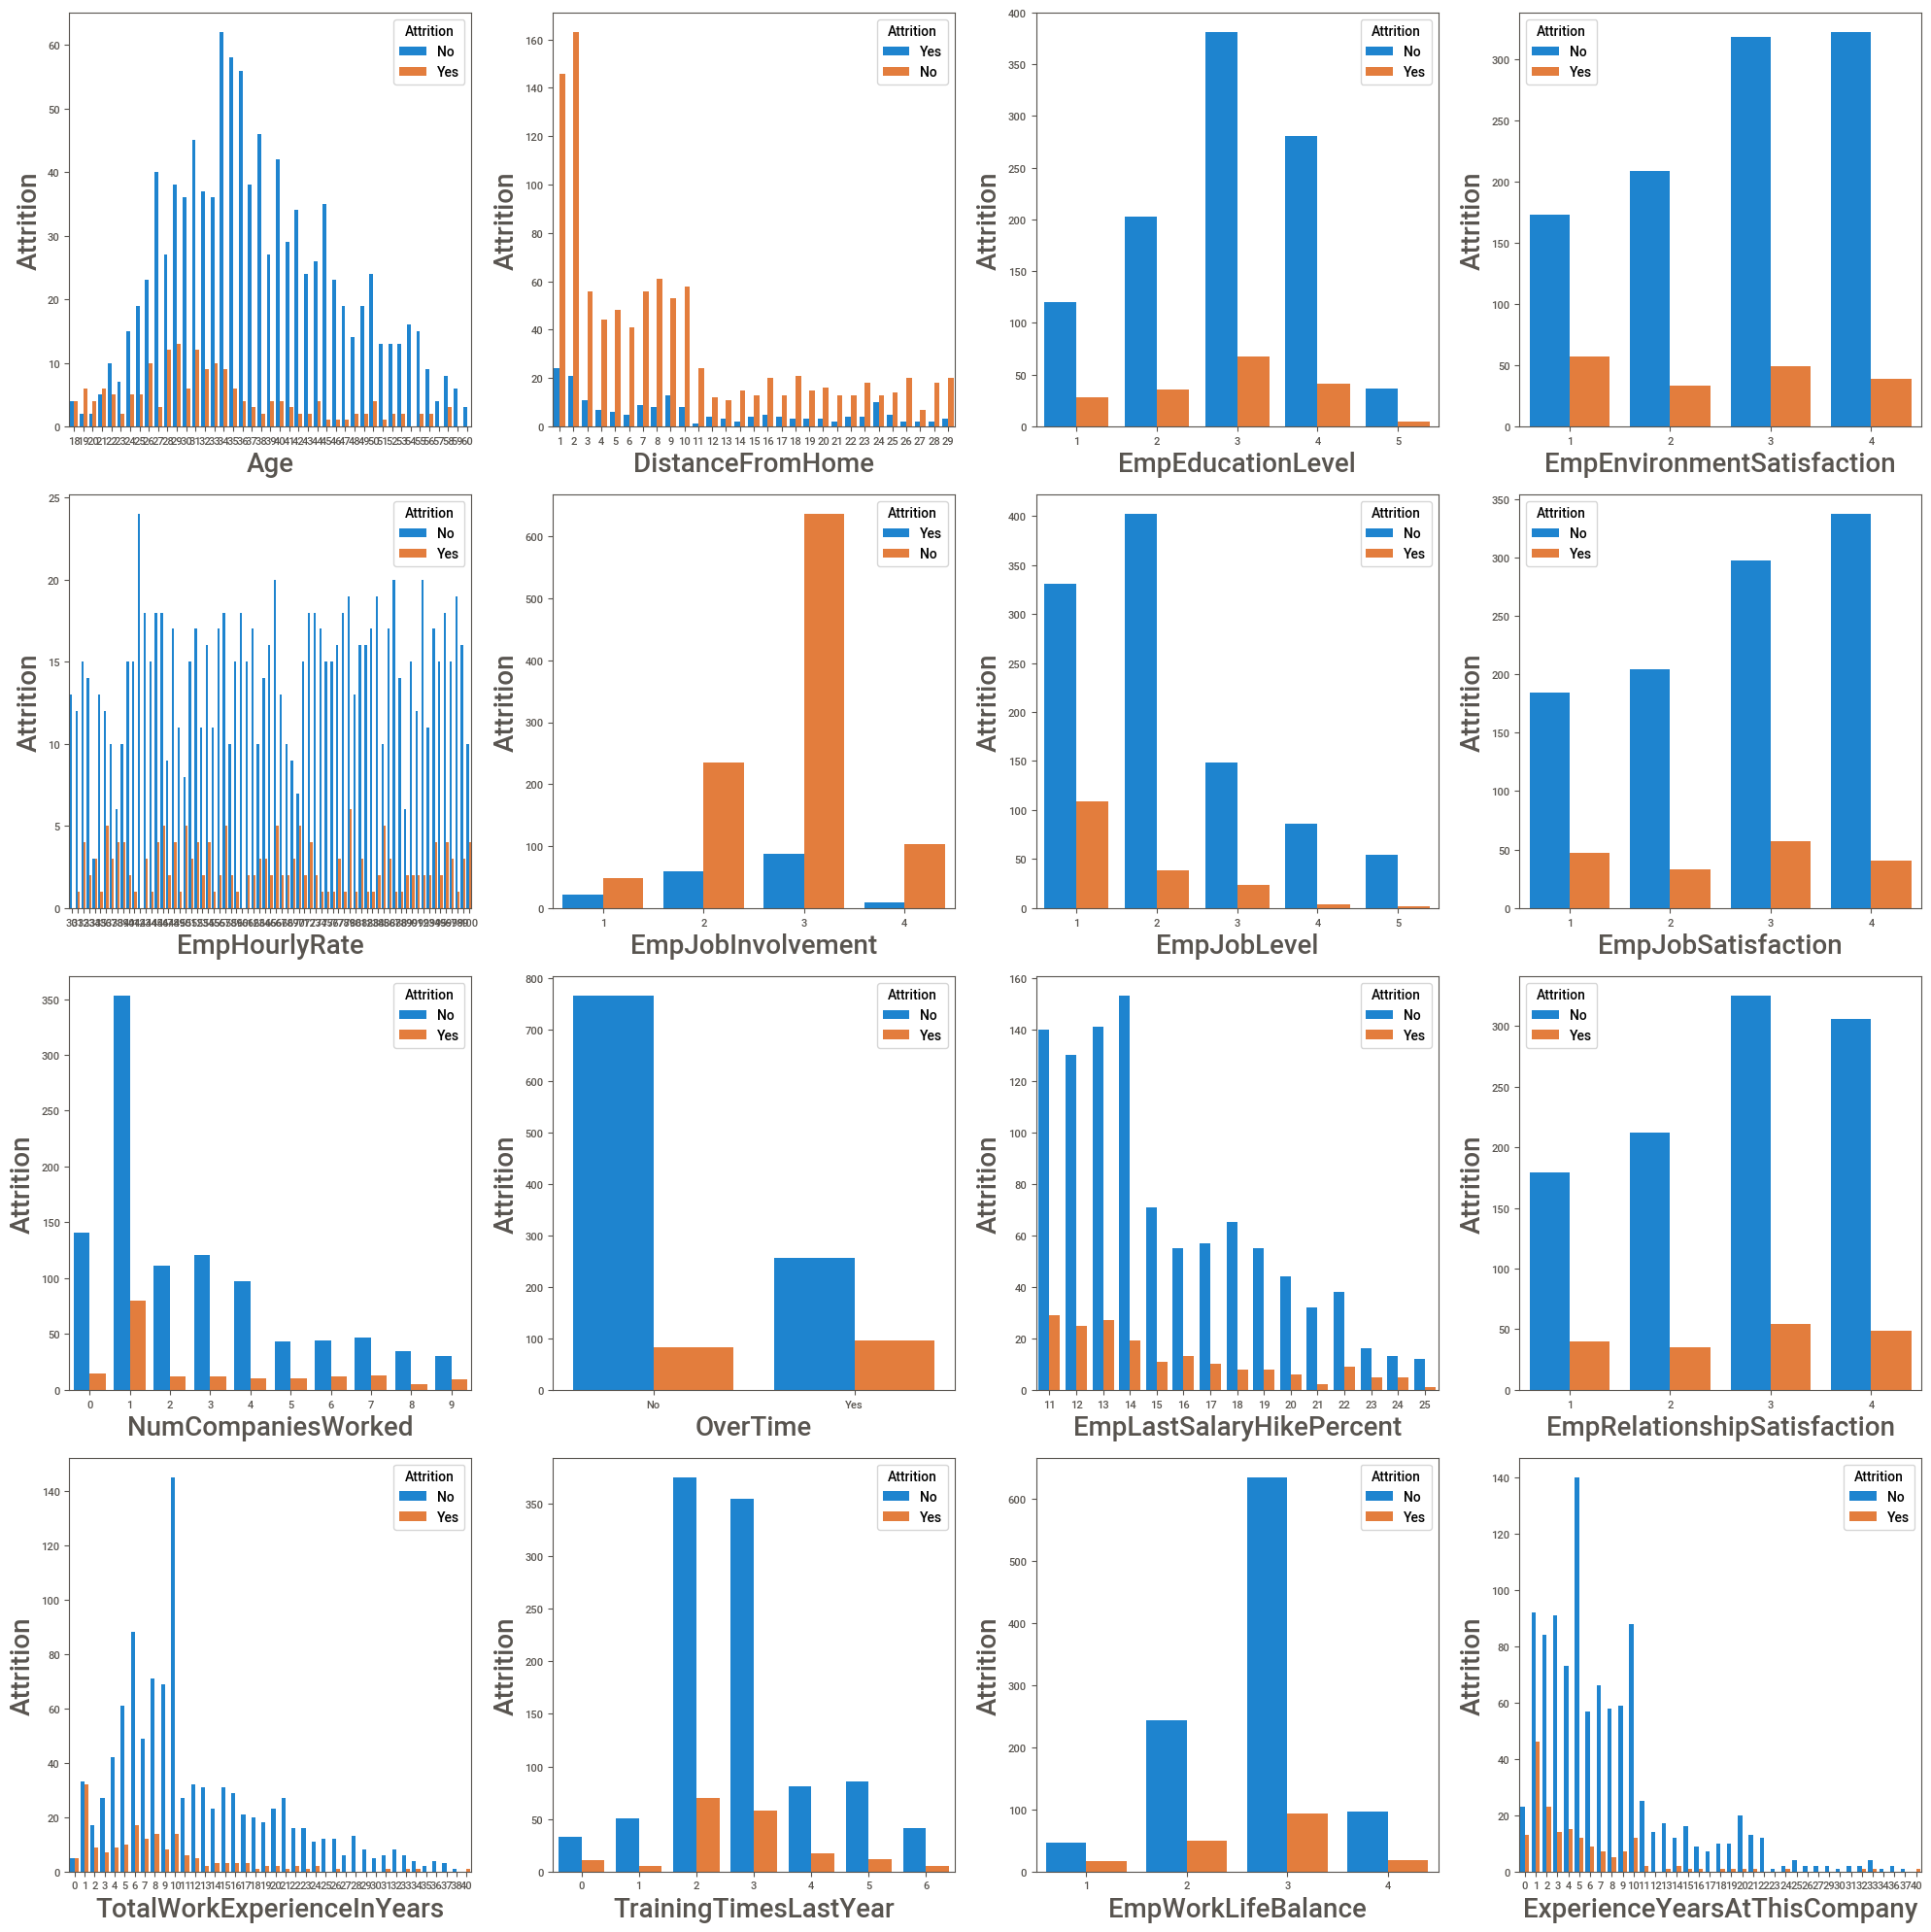

In [12]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data2[column].dropna(axis=0),hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Multivariate Analysis

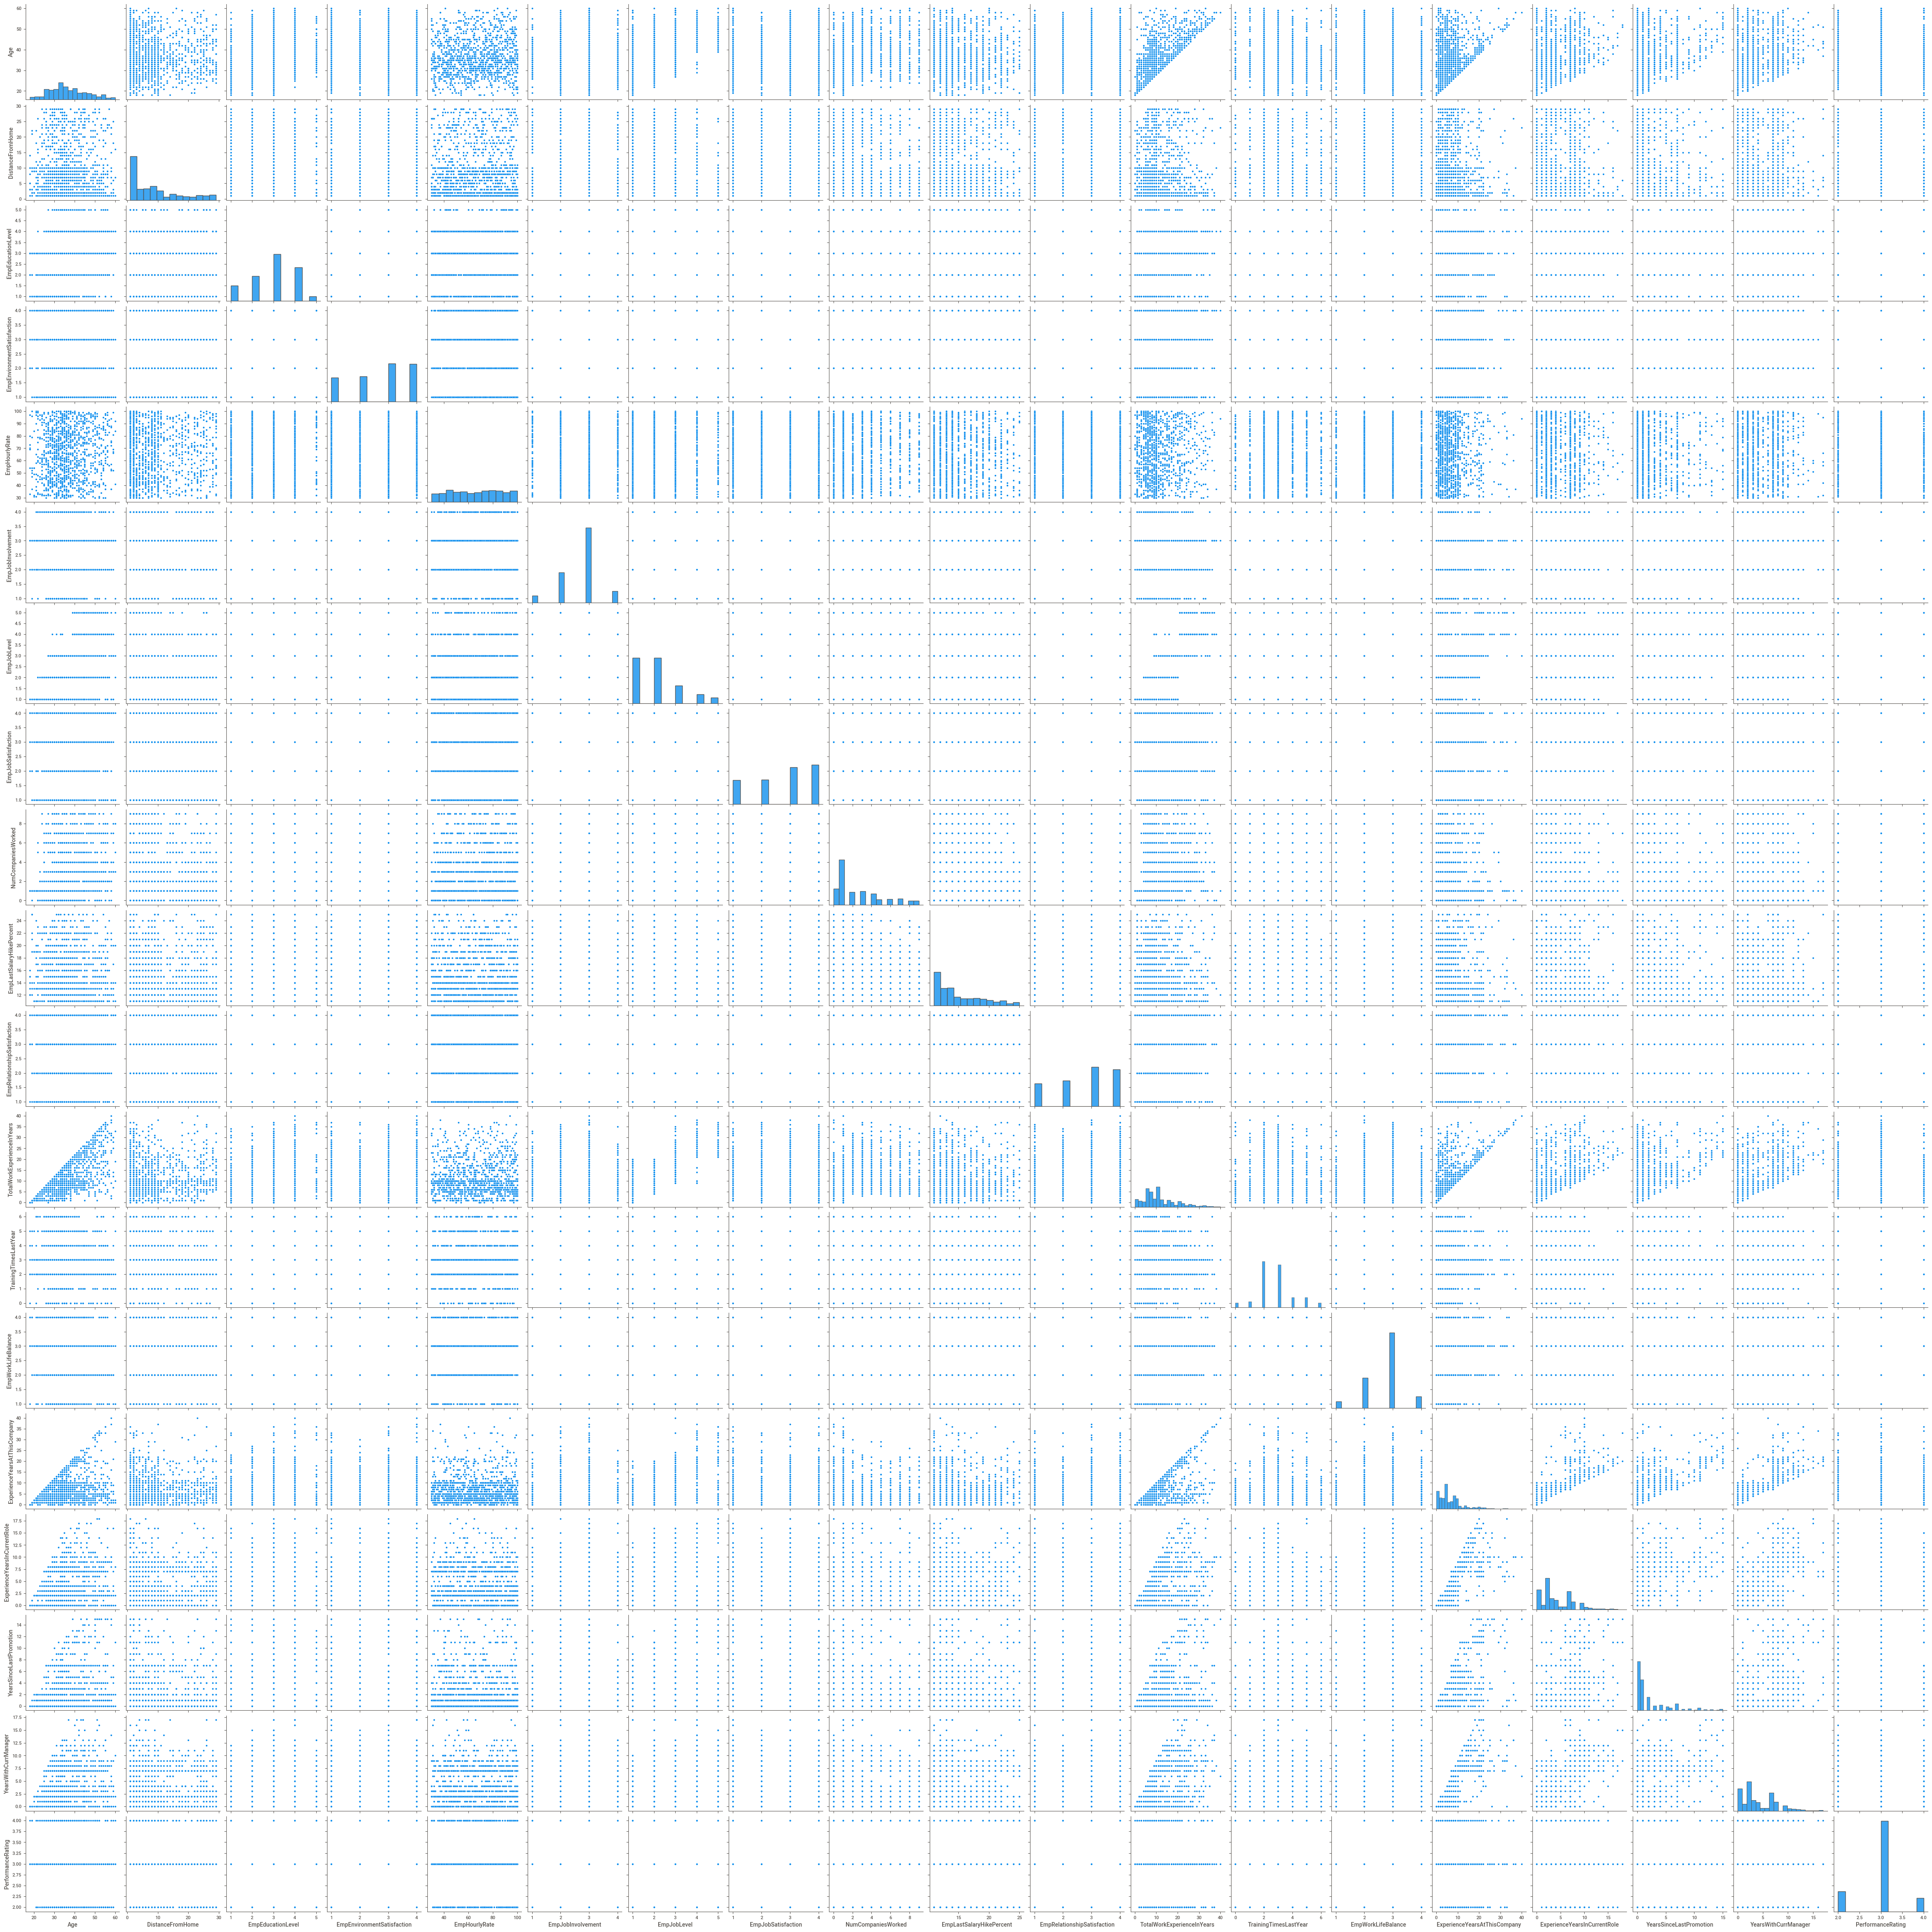

In [13]:
sns.pairplot(data=data)

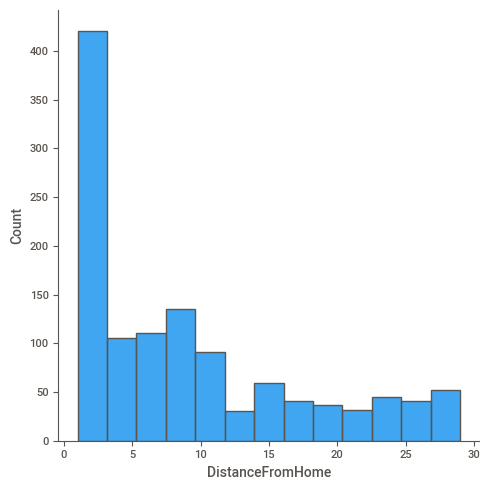

In [14]:
sns.displot(x=data['DistanceFromHome'])

## Heatmap plot

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
BusinessTravelFrequency = encoder.fit_transform(data.BusinessTravelFrequency)
data['BusinessTravelFrequency']=pd.DataFrame(BusinessTravelFrequency)

In [17]:
EducationBackground = encoder.fit_transform(data.EducationBackground)
data['EducationBackground']=pd.DataFrame(EducationBackground)

In [18]:
data['Gender'] = data.Gender.replace({'Male':1,'Female':0})

In [19]:
EmpJobRole = encoder.fit_transform(data.EmpJobRole)
data['EmpJobRole']=pd.DataFrame(EmpJobRole)

In [20]:
MaritalStatus = encoder.fit_transform(data.MaritalStatus)
data['MaritalStatus']=pd.DataFrame(MaritalStatus)

In [21]:
EmpDepartment = encoder.fit_transform(data.EmpDepartment)
data['EmpDepartment']=pd.DataFrame(EmpDepartment)

In [22]:
EmpNumber = encoder.fit_transform(data.EmpNumber)
data['EmpNumber']=pd.DataFrame(EmpNumber)

In [23]:
data['OverTime'] = data.OverTime.replace({'Yes':1,'No':0})

In [24]:
data['Attrition'] = data.Attrition.replace({'Yes':1,'No':0})

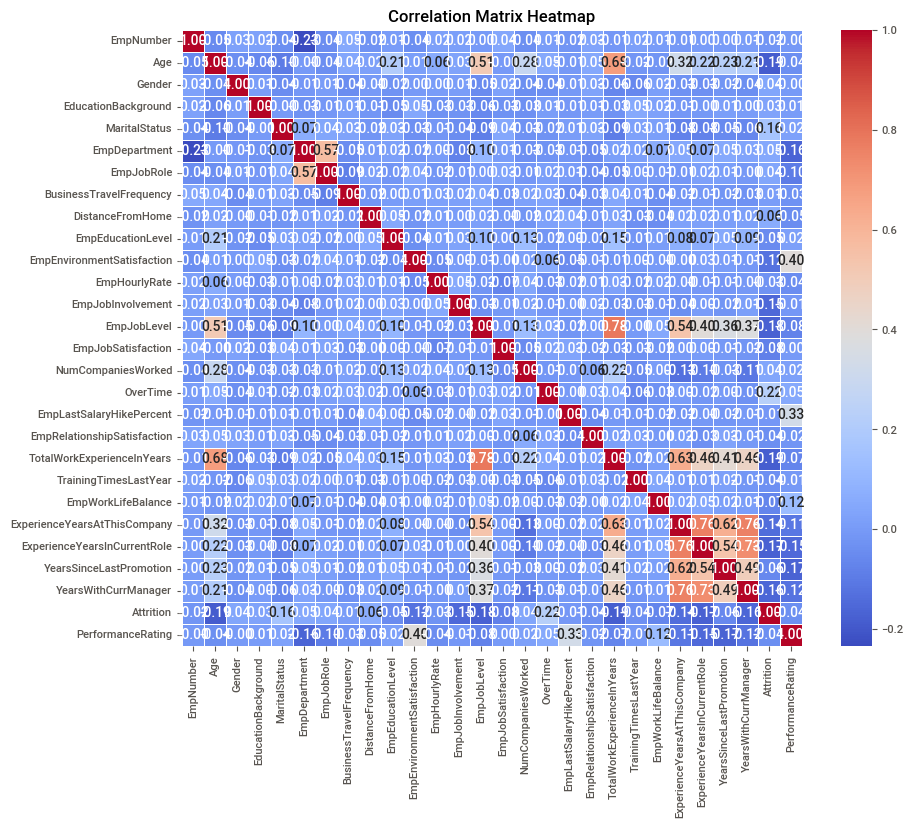

In [25]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()